<a href="https://colab.research.google.com/github/yifeiz-bu/Undergrad-researches/blob/main/oceanic_ridge_inspection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netCDF4
from google.colab import drive
drive.mount('/content/drive')
from netCDF4 import Dataset as NetCDFFile 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
nc = NetCDFFile('/content/drive/My Drive/Colab Notebooks/woa23_decav.nc')
nc
print(nc.variables.keys())

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 38.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.4 MB/s eta 0:00:00
Mounted at /content/drive
dict_keys(['crs', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'depth', 'depth_bnds', 'time', 'climatology_bounds', 't_an', 't_mn', 't_dd', 't_sd', 't_se', 't_oa', 't_gp'])


# SST view

In [ ]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][159:176]
depth = nc.variables['depth'][:]
temp = nc.variables['t_an'][0,:,49:101,159:176]

In [ ]:
temp.shape

(102, 52, 17)

In [ ]:
lat.shape

(52,)

In [ ]:
lon.shape

(17,)

In [ ]:
T = temp[0,:,:]

In [ ]:
T.shape

(52, 17)

In [ ]:
Tt= np.transpose(T[:,:])

In [ ]:
latv, lonv = np.meshgrid(lat,lon,indexing='xy')
latv.shape



(17, 52)

In [ ]:
Tt.shape

(17, 52)

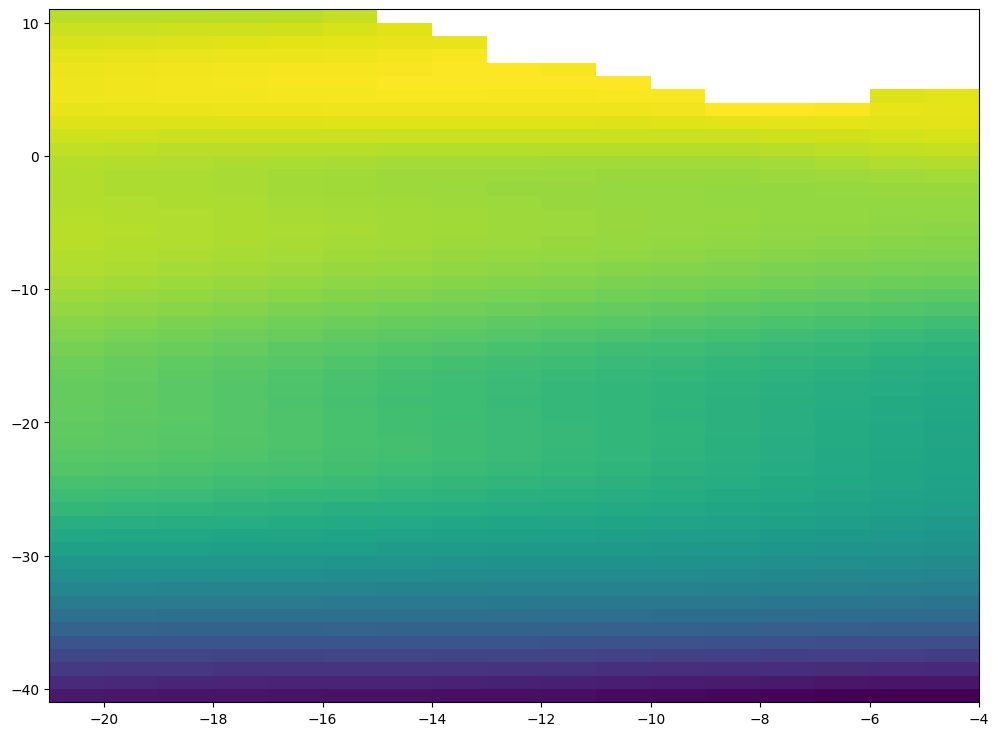

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(lonv,latv,Tt) #doesn't match the grid of X and Y axis（15，52）to(360,180)
plt.show()

In [ ]:
depth.shape

(102,)

# Side/vertical view


In [ ]:
depth

masked_array(data=[0.00e+00, 5.00e+00, 1.00e+01, 1.50e+01, 2.00e+01,
                   2.50e+01, 3.00e+01, 3.50e+01, 4.00e+01, 4.50e+01,
                   5.00e+01, 5.50e+01, 6.00e+01, 6.50e+01, 7.00e+01,
                   7.50e+01, 8.00e+01, 8.50e+01, 9.00e+01, 9.50e+01,
                   1.00e+02, 1.25e+02, 1.50e+02, 1.75e+02, 2.00e+02,
                   2.25e+02, 2.50e+02, 2.75e+02, 3.00e+02, 3.25e+02,
                   3.50e+02, 3.75e+02, 4.00e+02, 4.25e+02, 4.50e+02,
                   4.75e+02, 5.00e+02, 5.50e+02, 6.00e+02, 6.50e+02,
                   7.00e+02, 7.50e+02, 8.00e+02, 8.50e+02, 9.00e+02,
                   9.50e+02, 1.00e+03, 1.05e+03, 1.10e+03, 1.15e+03,
                   1.20e+03, 1.25e+03, 1.30e+03, 1.35e+03, 1.40e+03,
                   1.45e+03, 1.50e+03, 1.55e+03, 1.60e+03, 1.65e+03,
                   1.70e+03, 1.75e+03, 1.80e+03, 1.85e+03, 1.90e+03,
                   1.95e+03, 2.00e+03, 2.10e+03, 2.20e+03, 2.30e+03,
                   2.40e+03, 2.50e

In [ ]:
lat = nc.variables['lat'][49:101]
lon = nc.variables['lon'][165]
depth = nc.variables['depth'][0:40]
temp = nc.variables['t_an'][0,0:40,49:101,165]

In [ ]:
depth=depth*-1

In [ ]:
for i in [lat,lon,depth,temp]:
  i.shape
  print(i.shape)

(52,)
()
(40,)
(40, 52)


In [ ]:
latv,depthv= np.meshgrid(lat,depth,indexing='xy')
latv.shape

(40, 52)

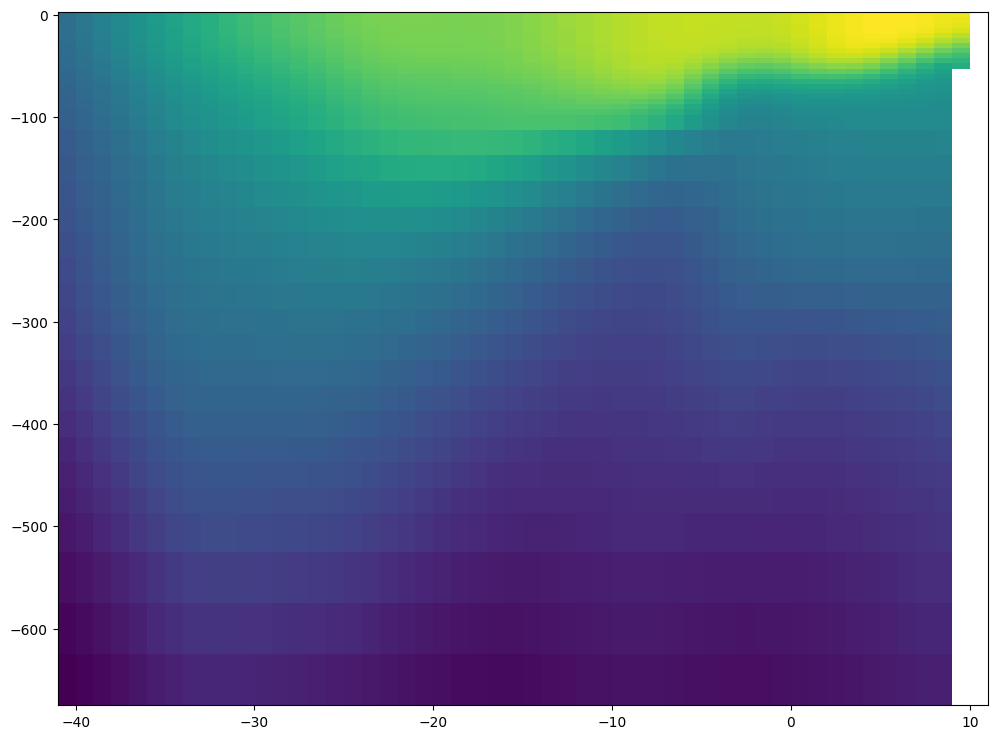

In [ ]:
fig = plt.figure(figsize=(12,9))
plt.pcolormesh(latv,depthv,temp) 
plt.show()

latitude cut-off

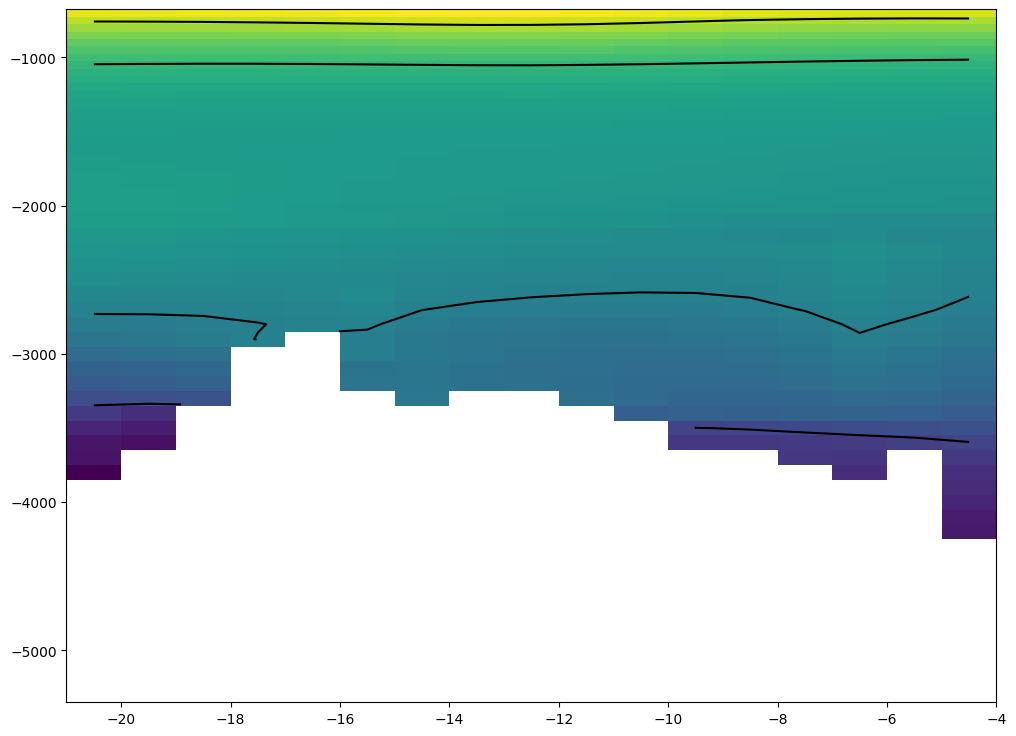

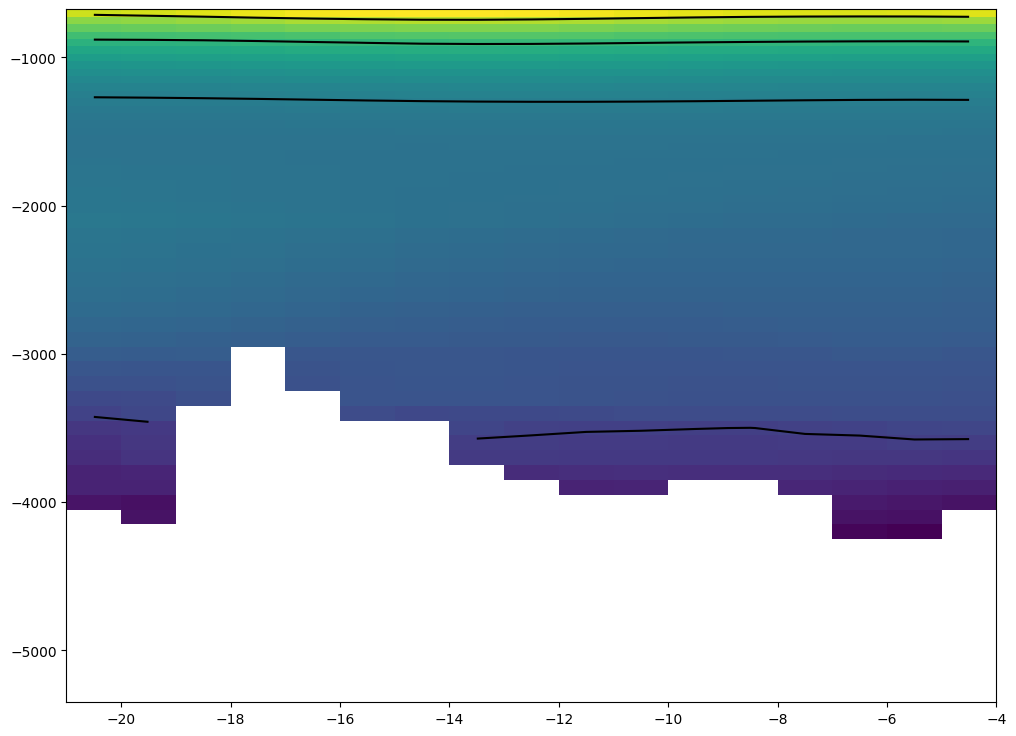

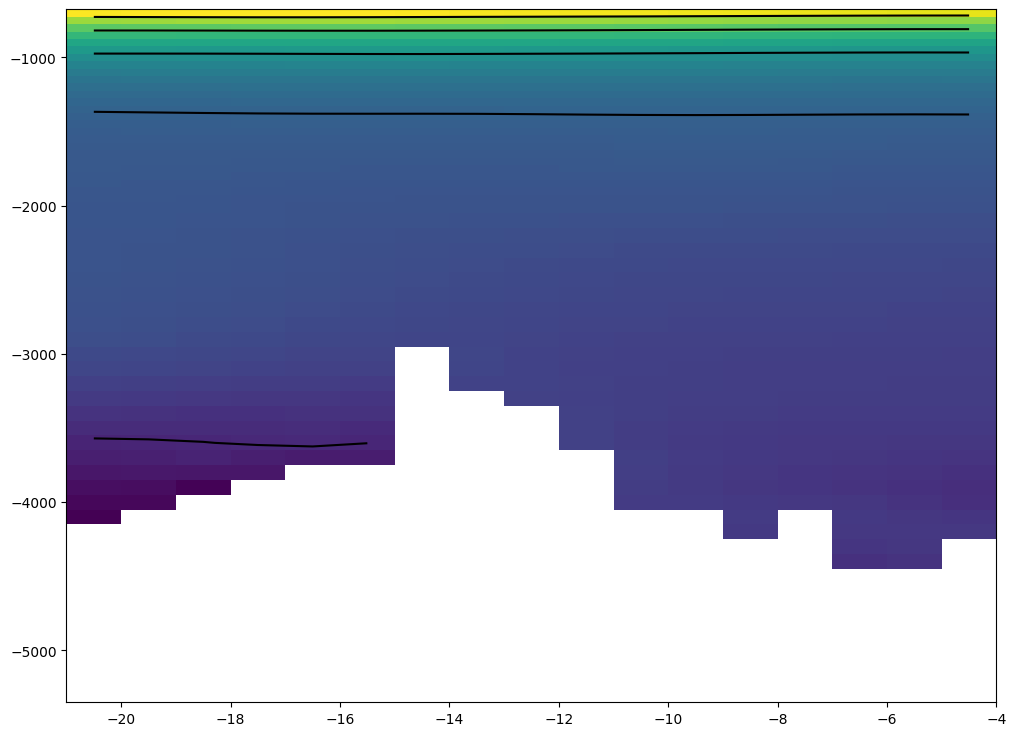

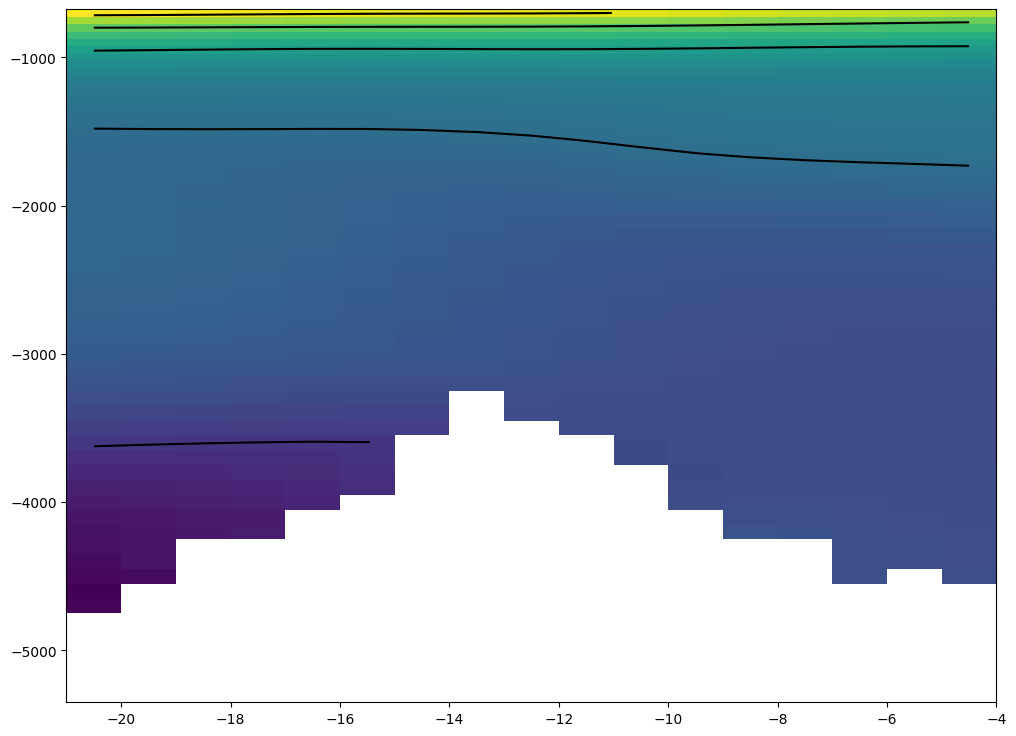

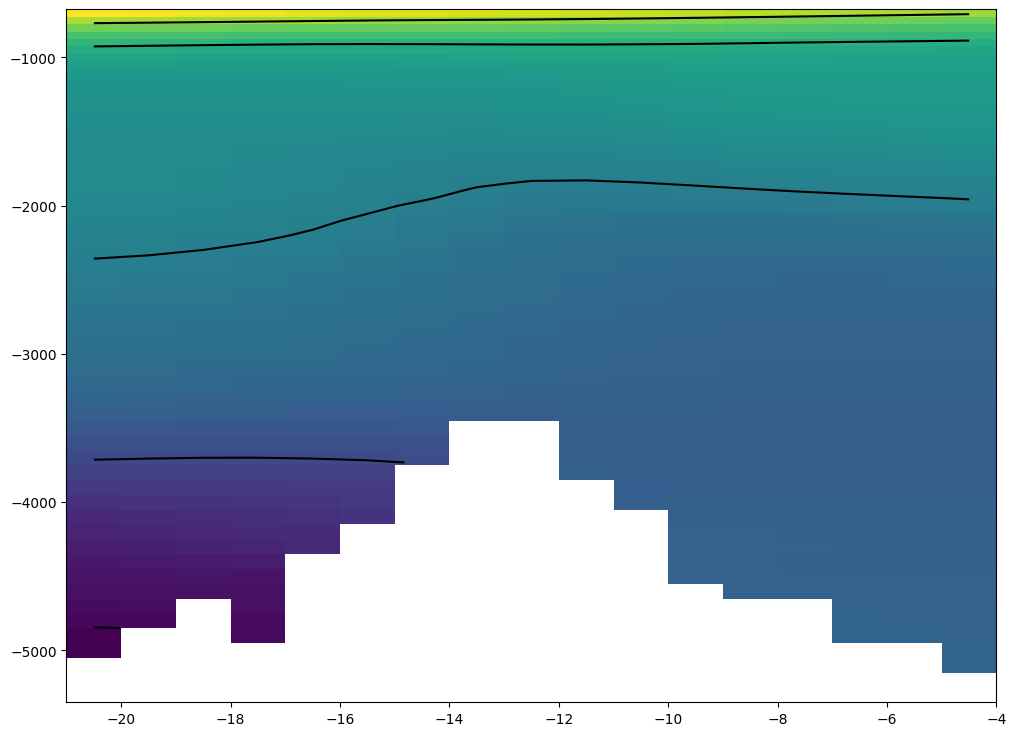

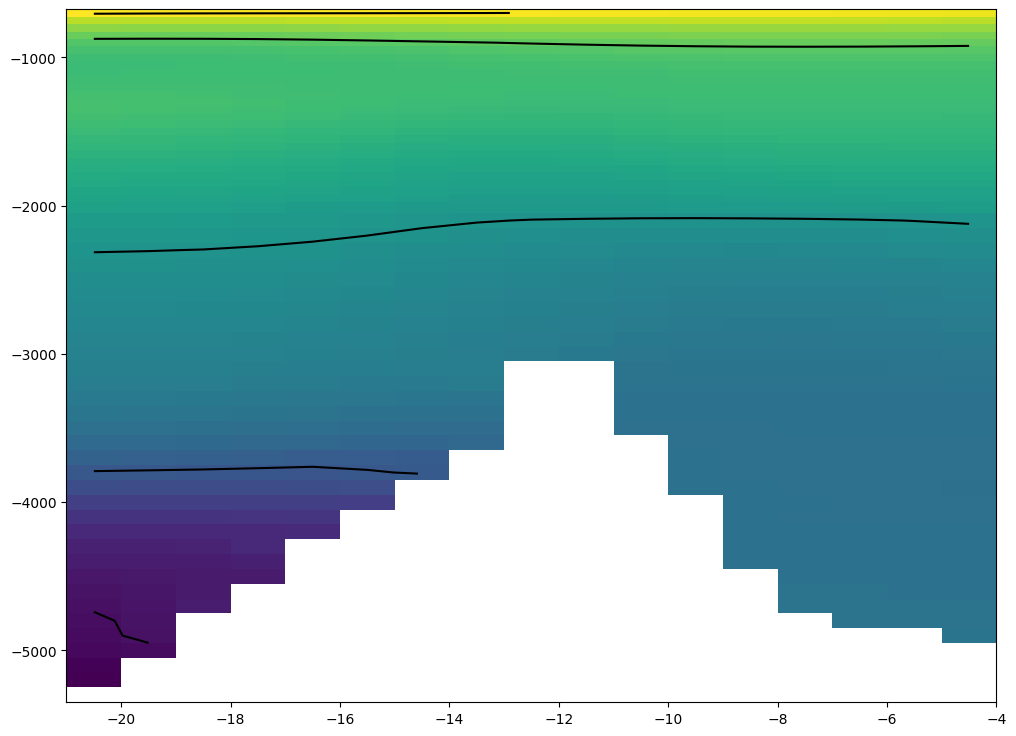

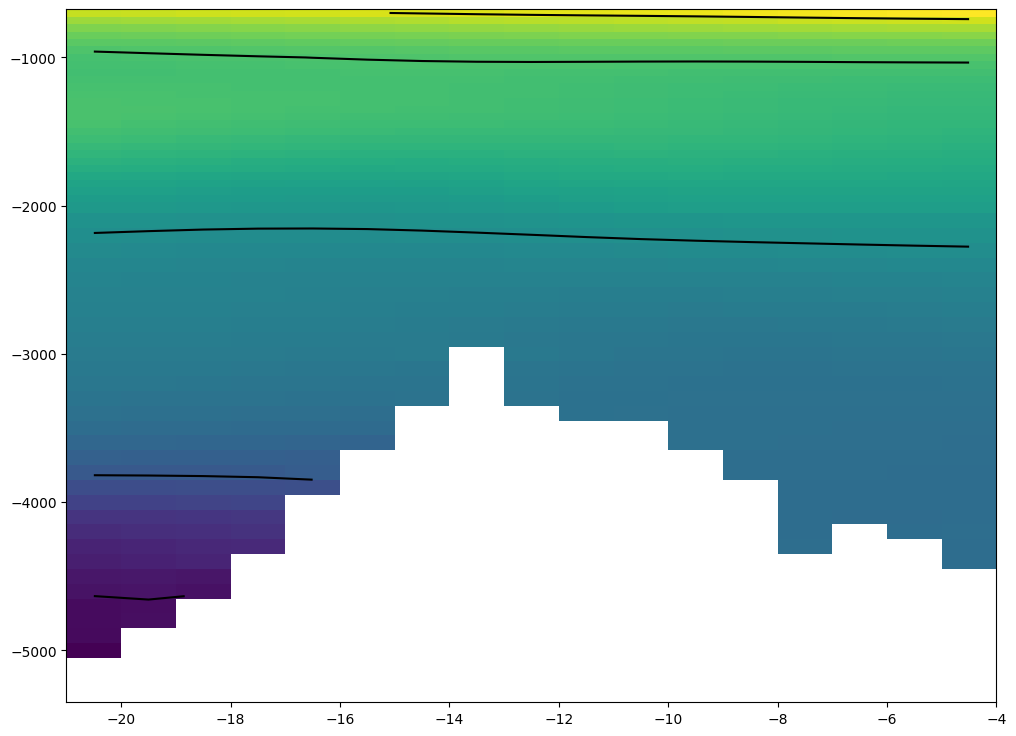

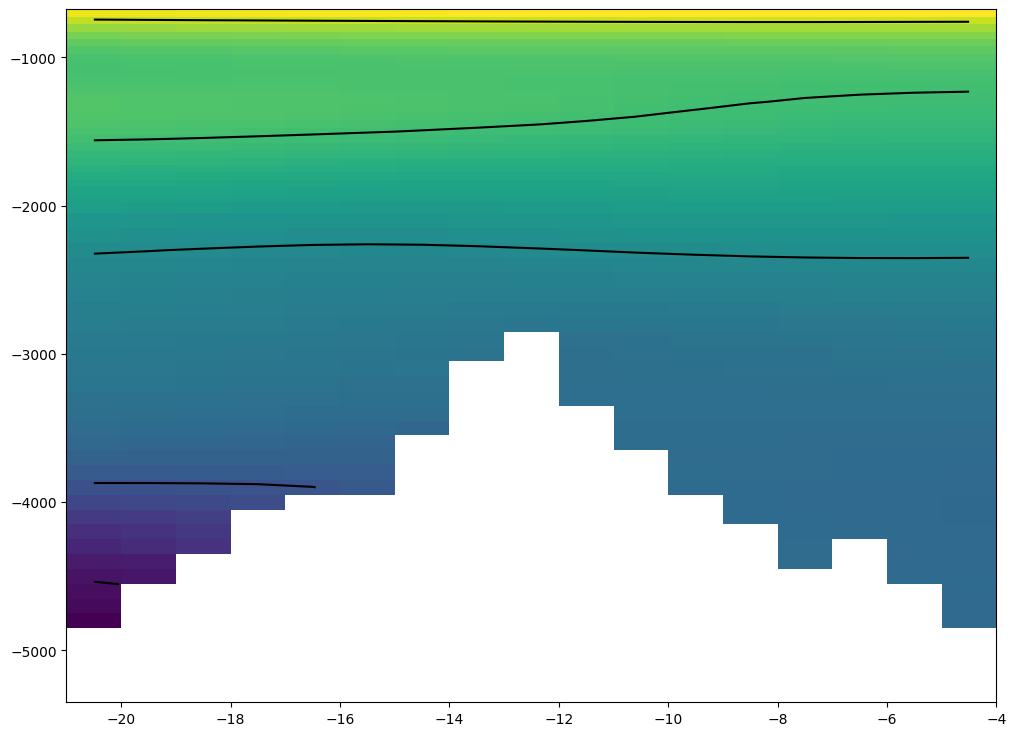

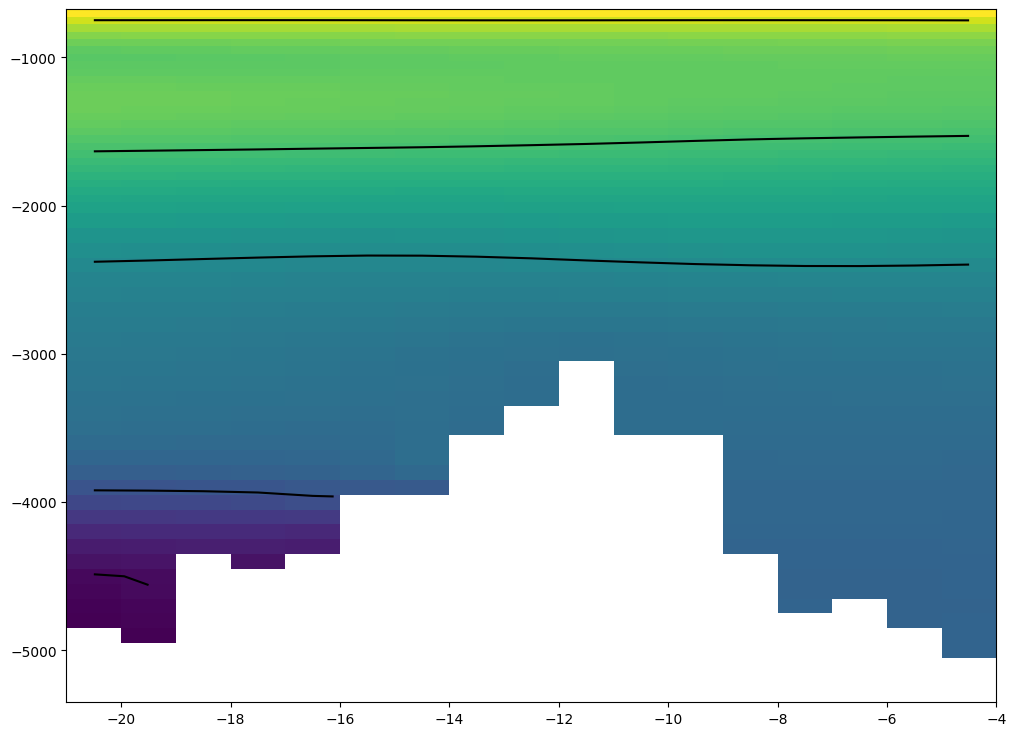

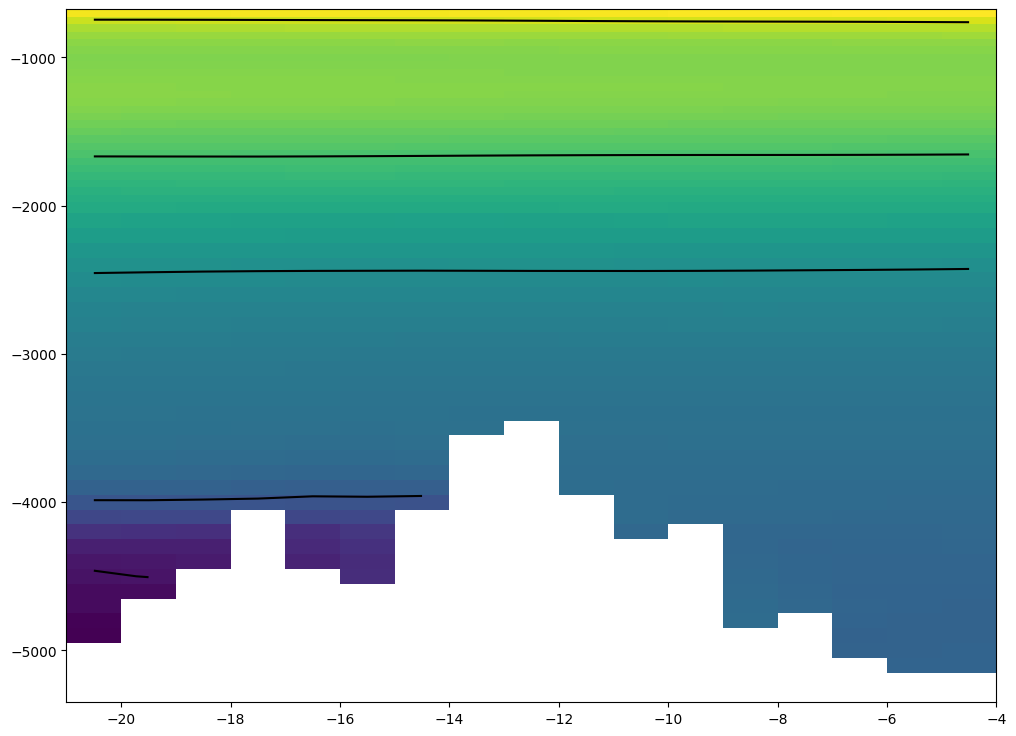

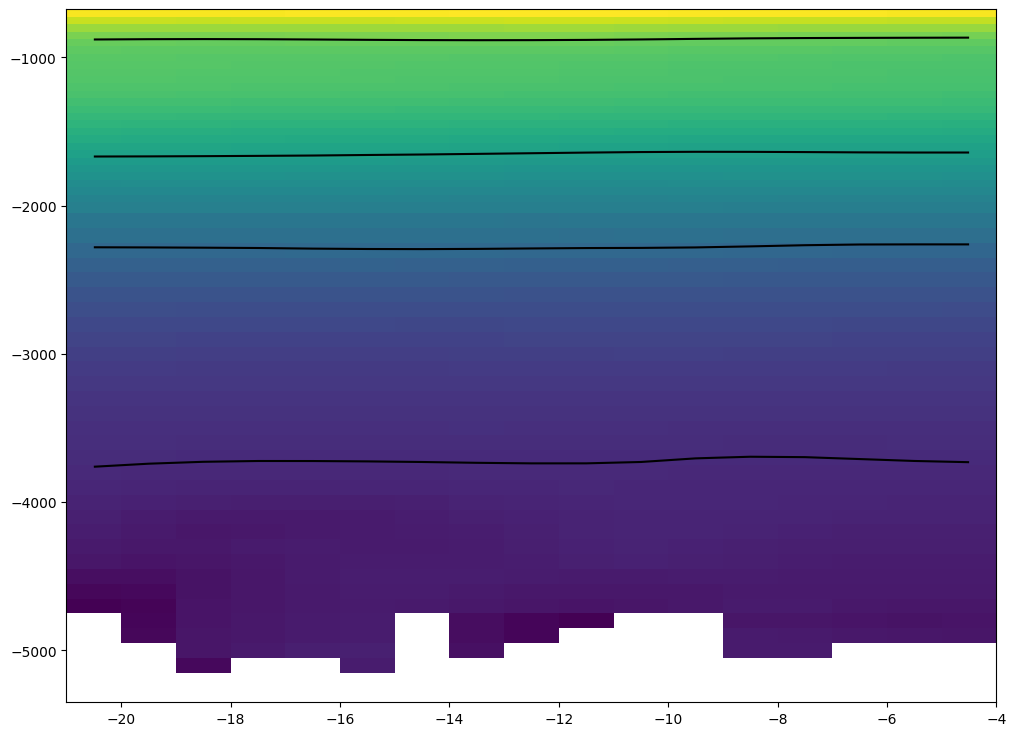

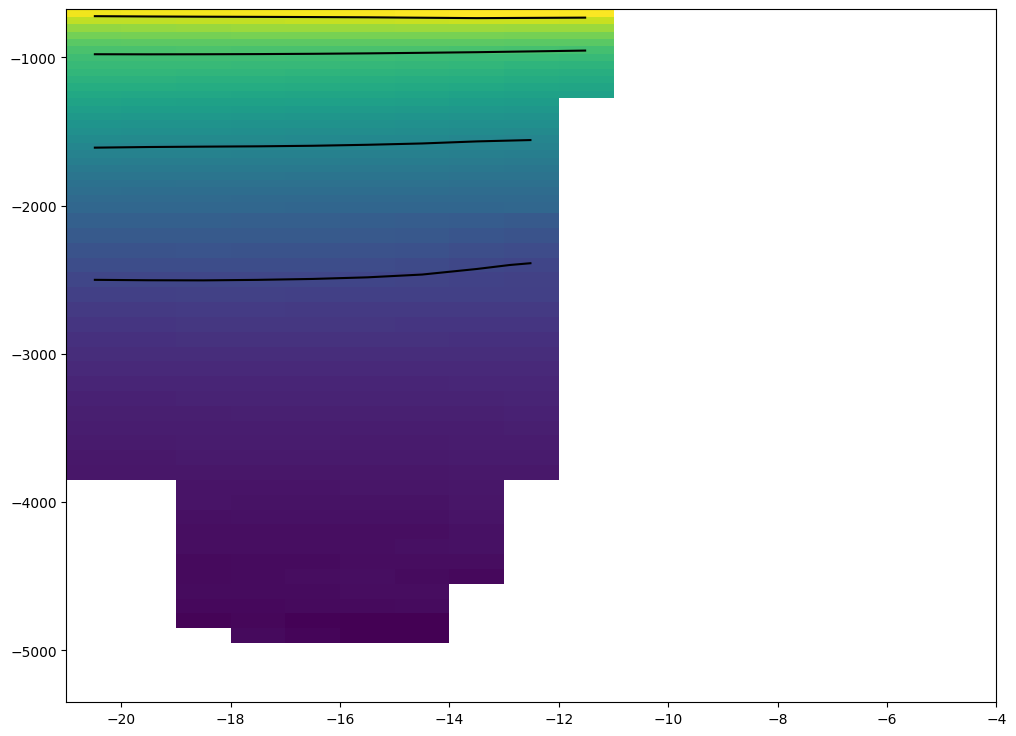

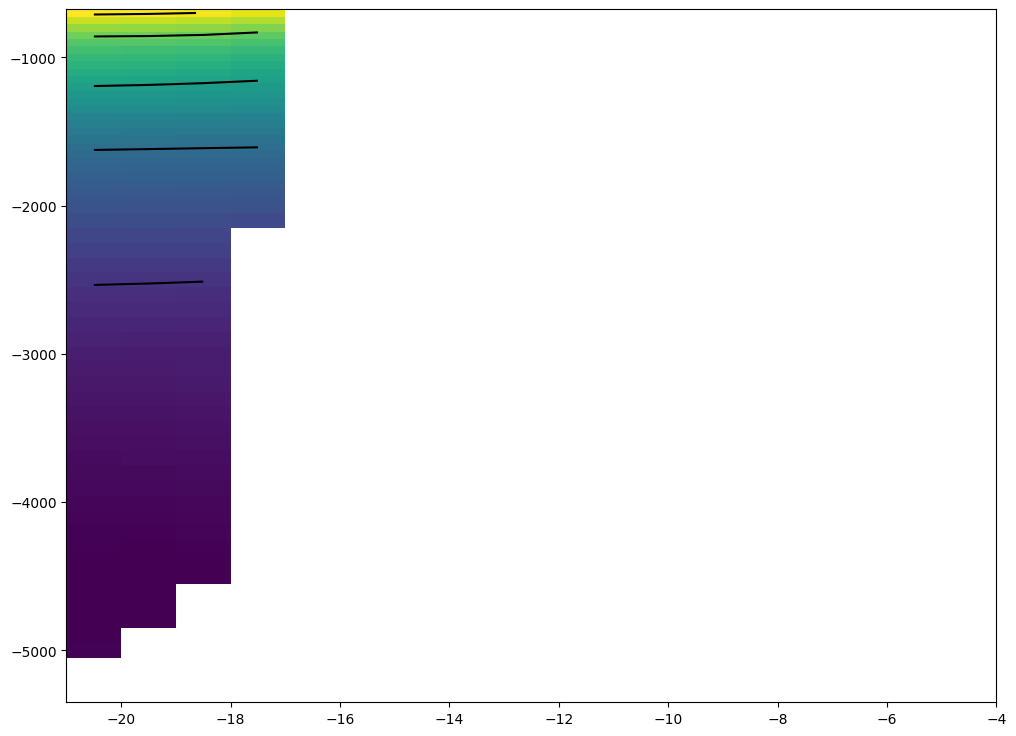

In [ ]:
for i in np.linspace(49,101,13):
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][40:100]
  temp = nc.variables['t_an'][0,40:100,i,159:176]
  depth=depth*-1
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv,depthv,temp,4,colors='k',origin='lower') 
  plt.pcolormesh(lonv,depthv,temp) 
  plt.show()
  

longitude cut-off

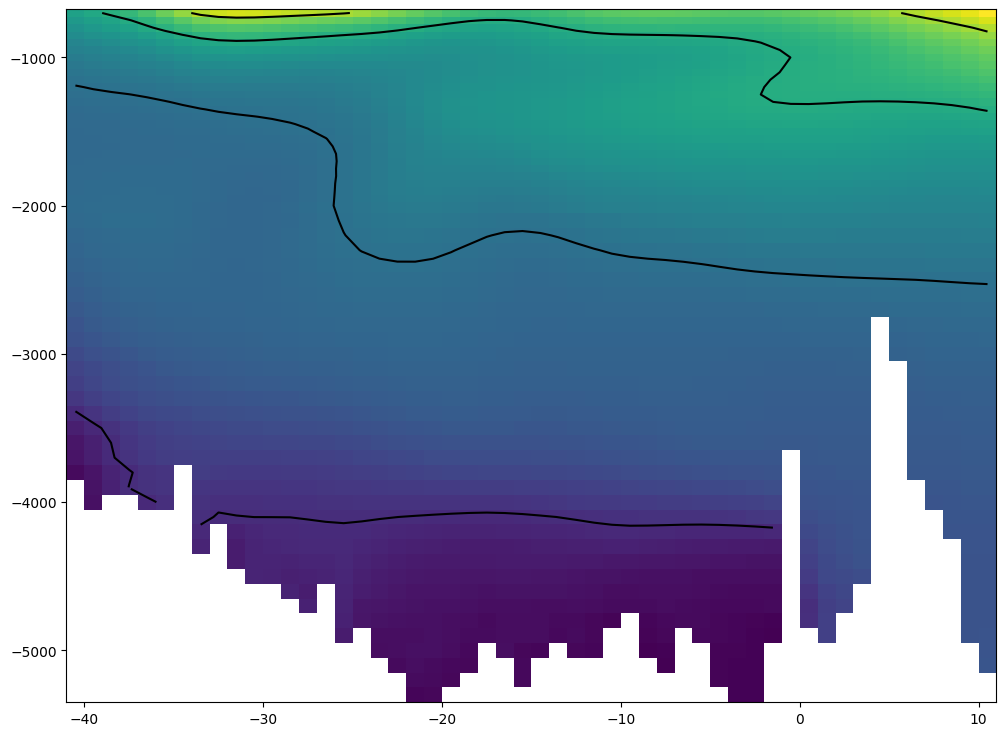

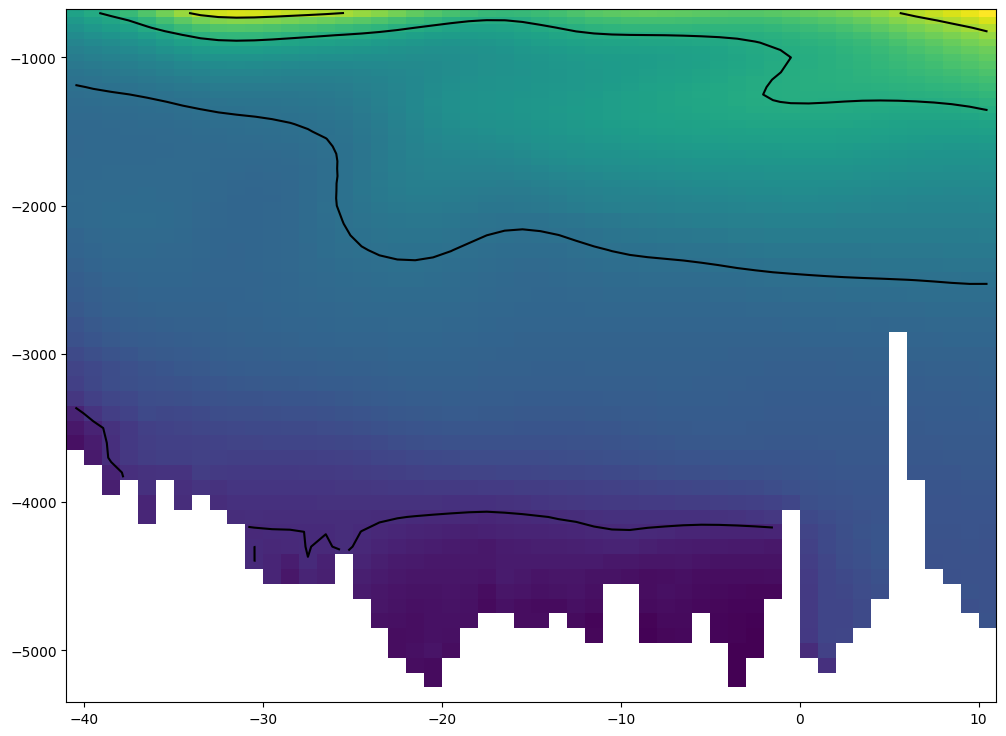

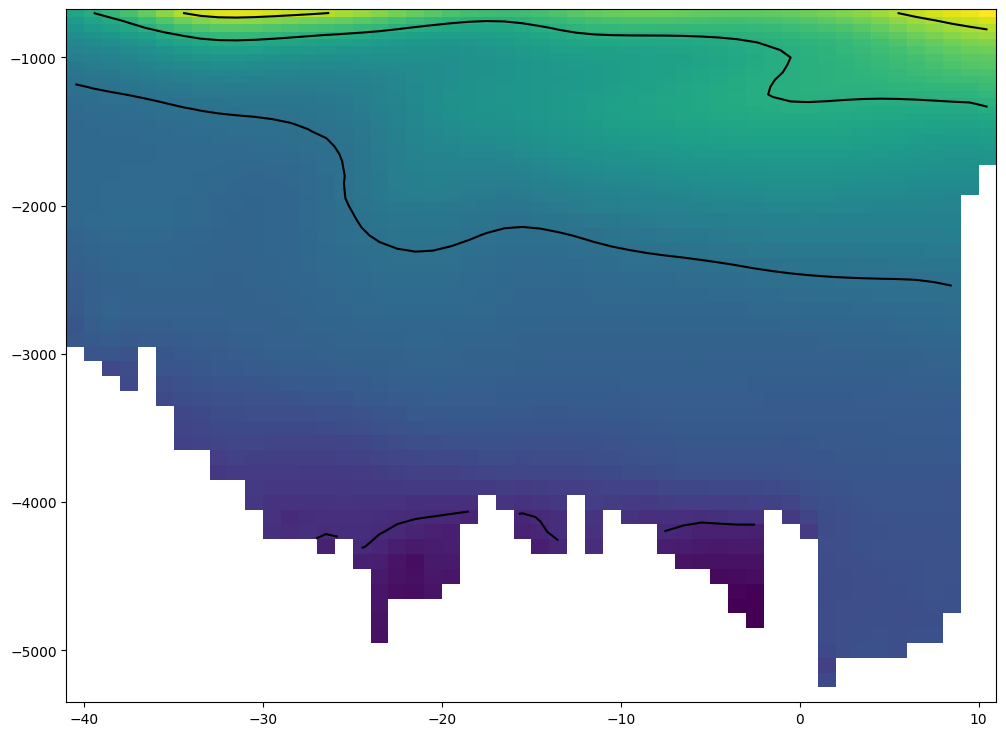

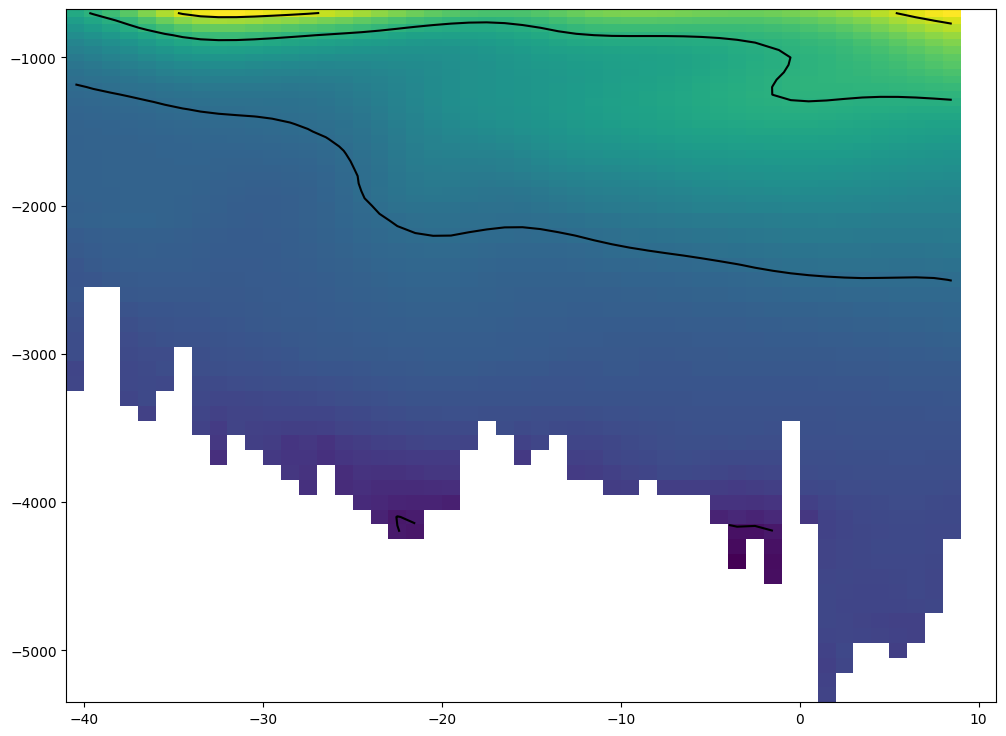

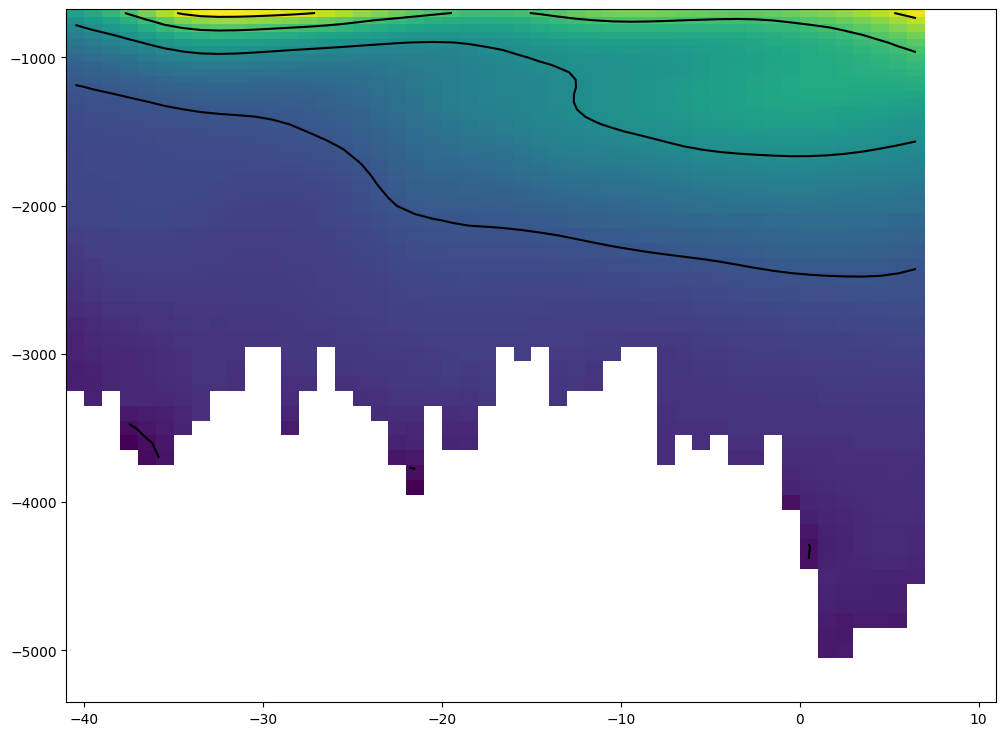

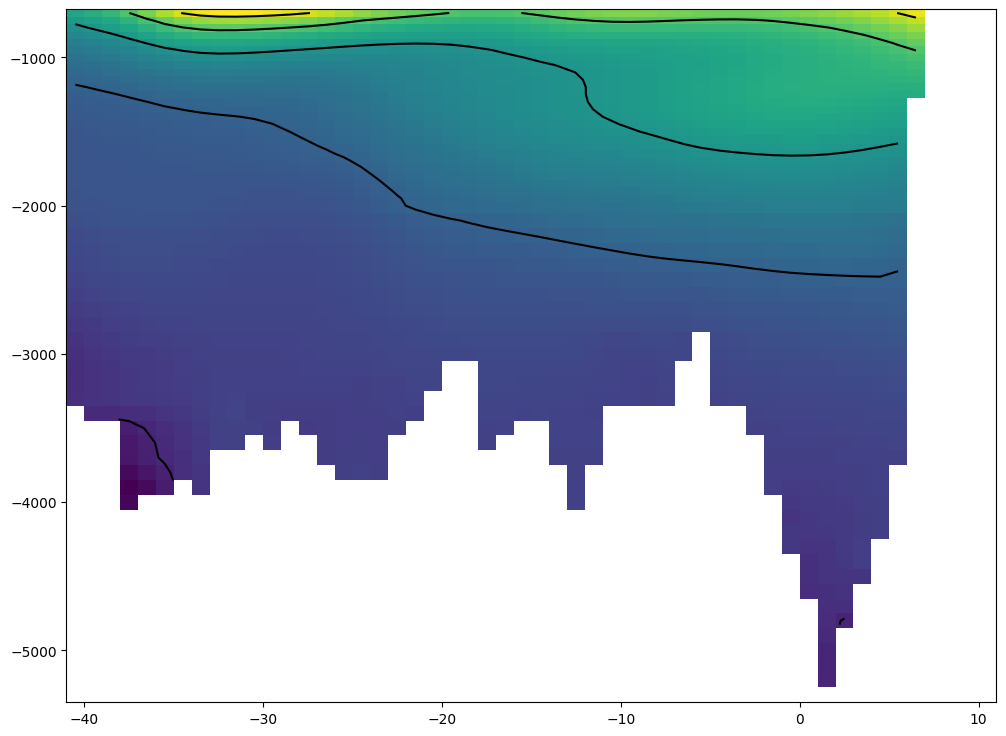

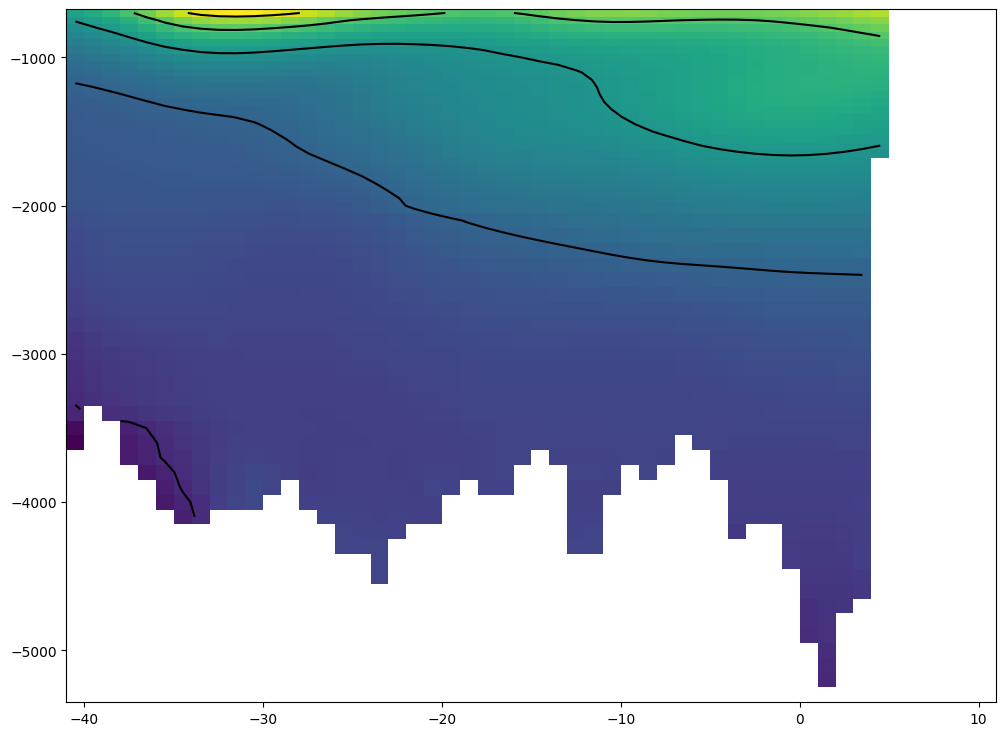

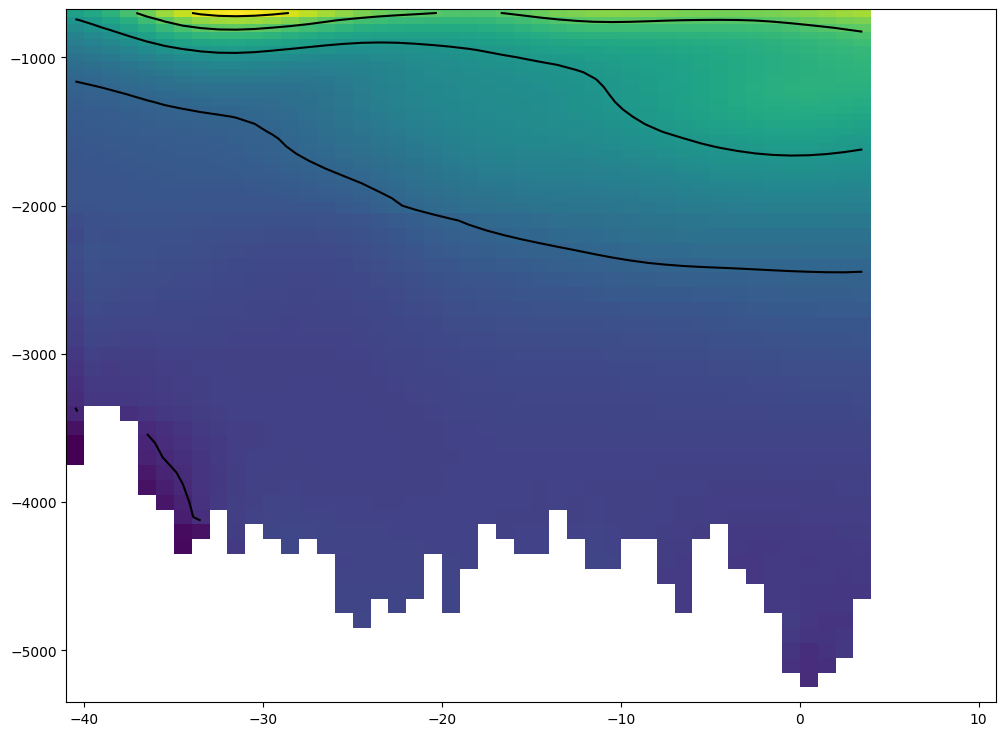

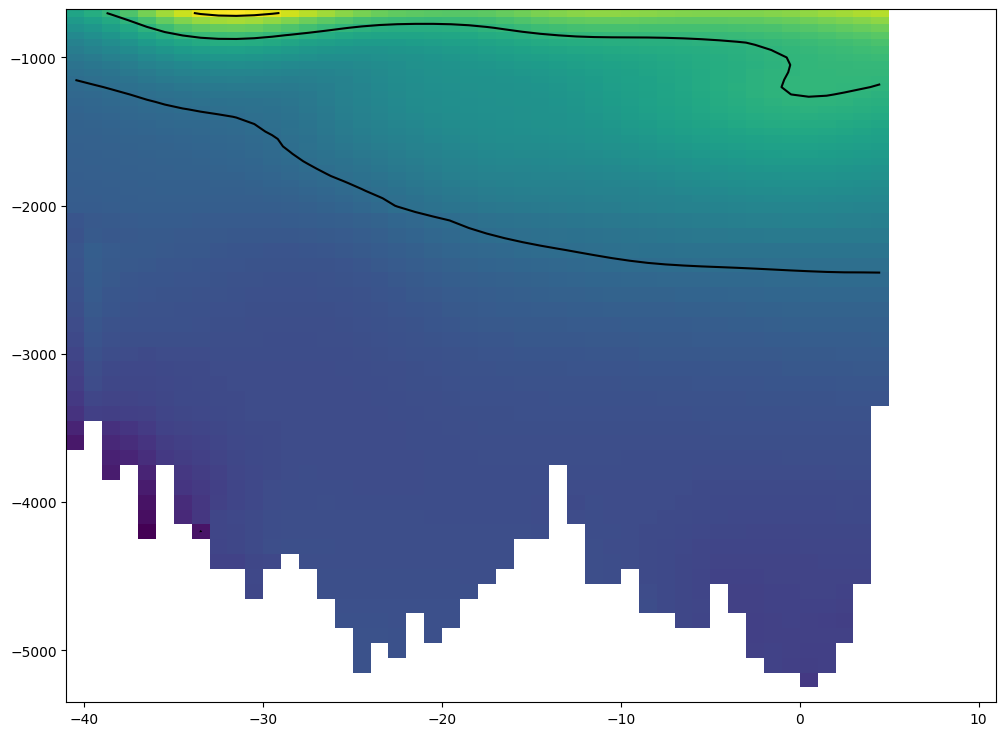

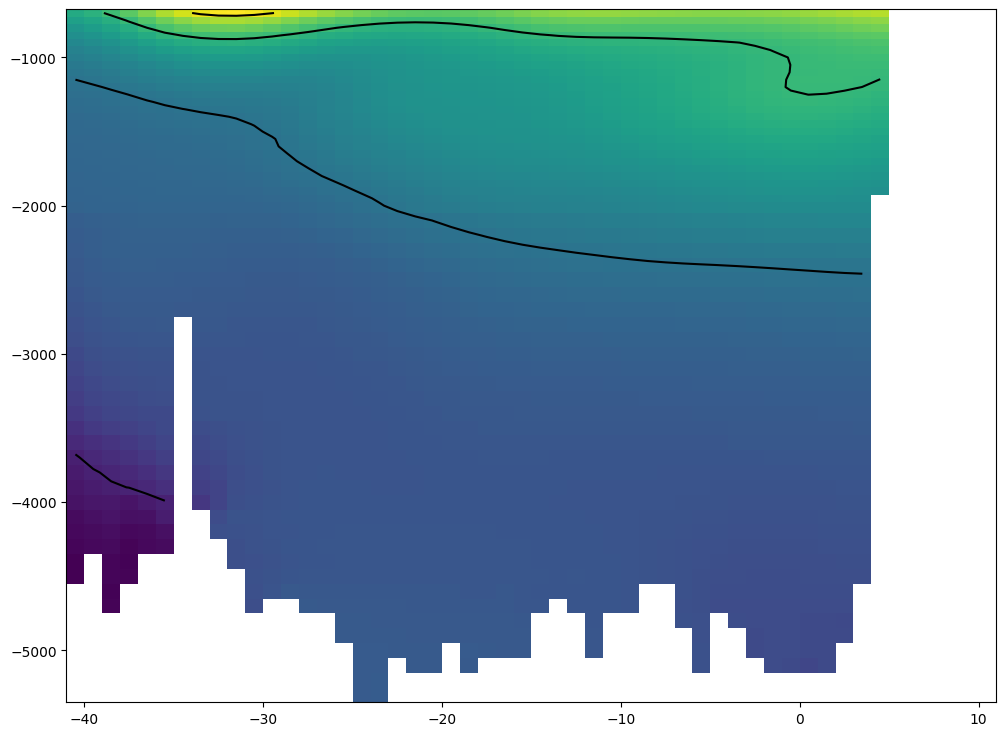

In [ ]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][40:100]
  temp = nc.variables['t_an'][0,40:100,49:101,i]
  depth=depth*-1
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower')
  plt.pcolormesh(latv,depthv,temp) 
  plt.show()

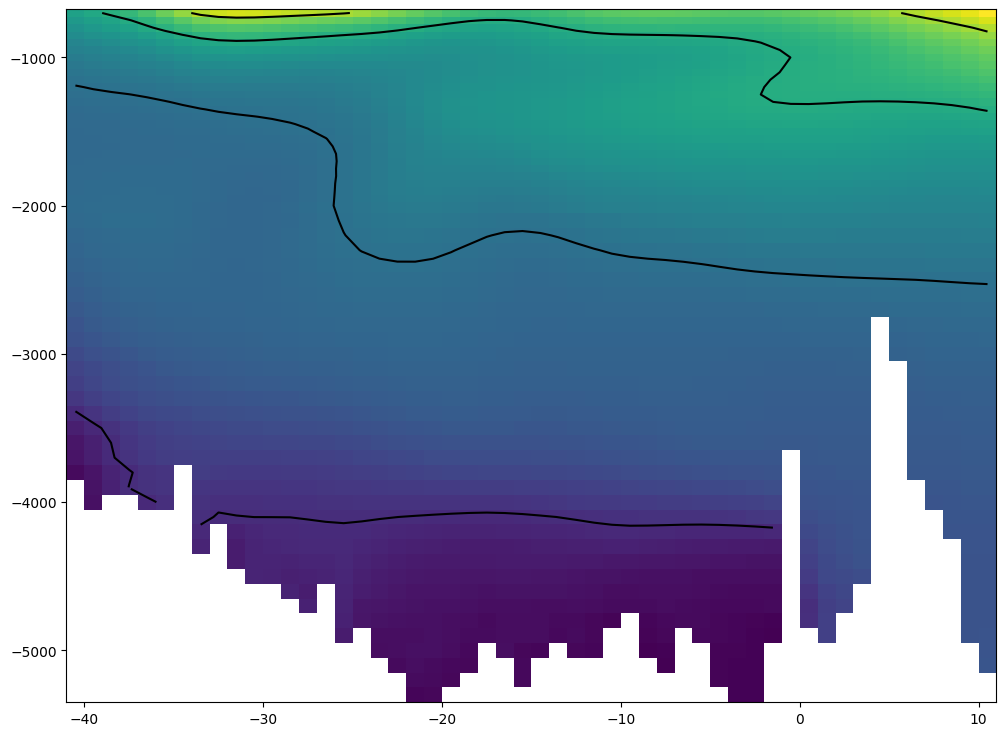

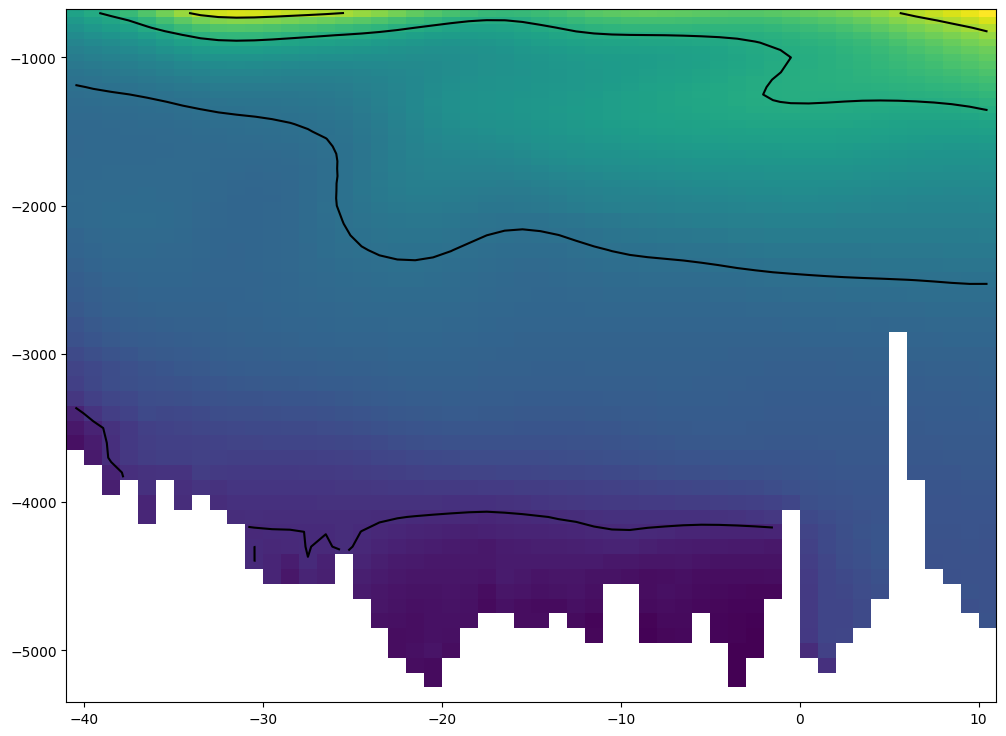

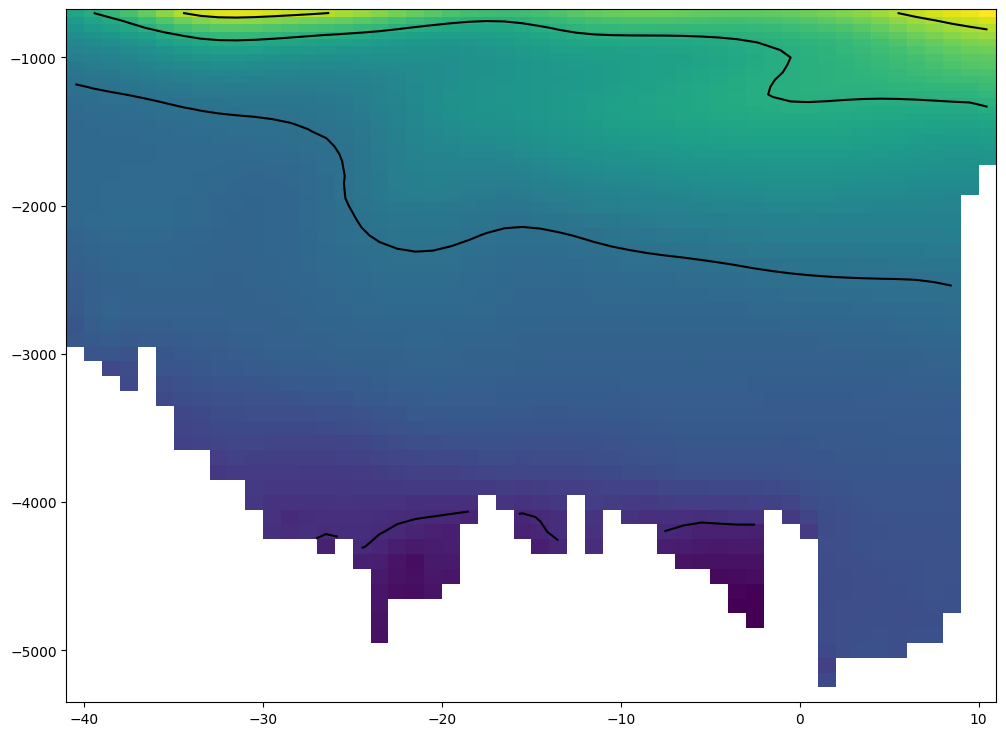

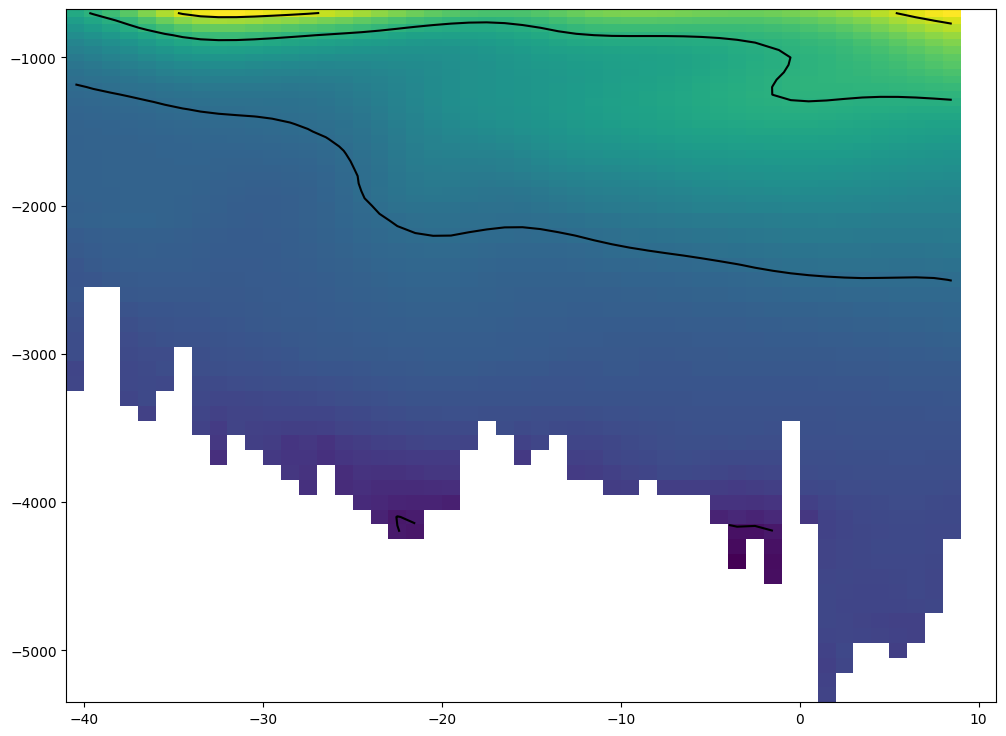

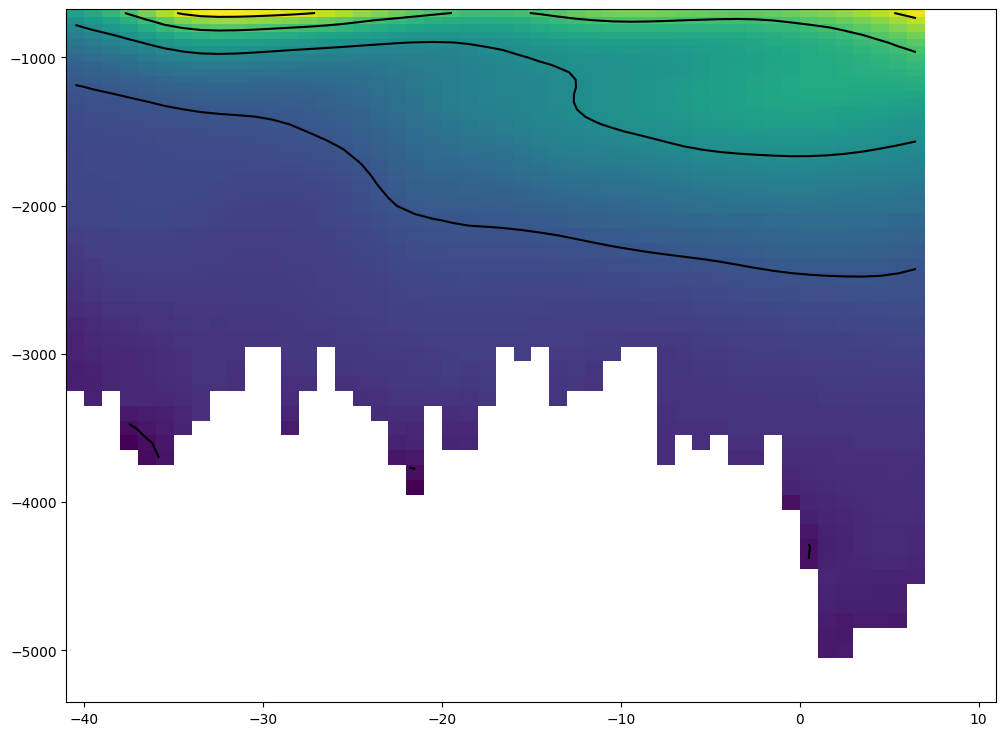

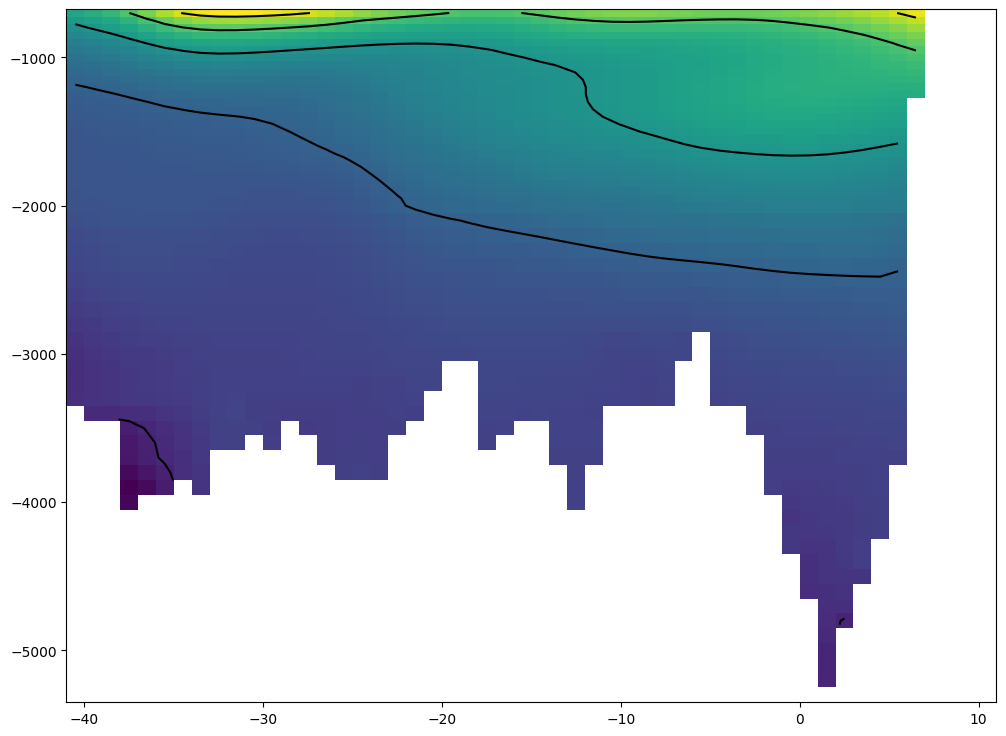

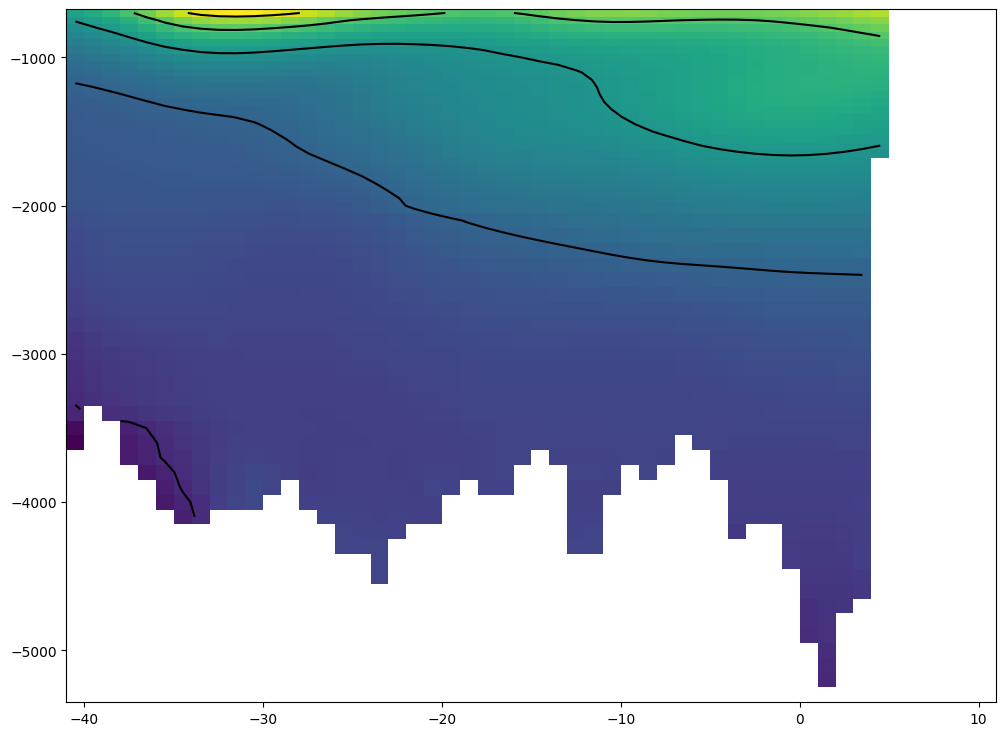

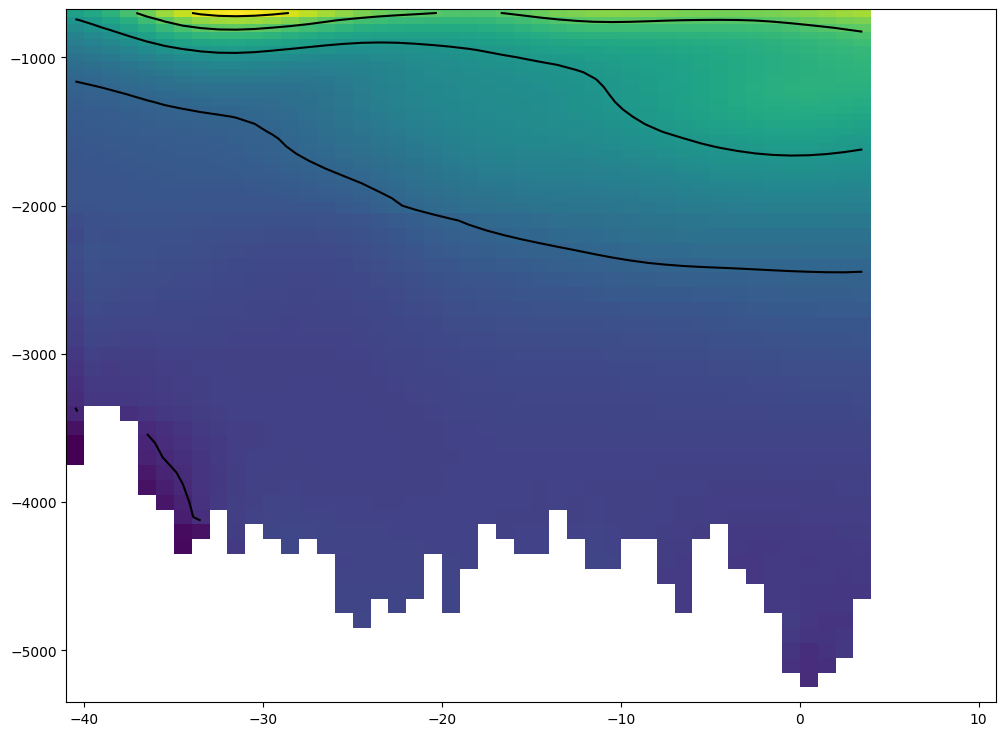

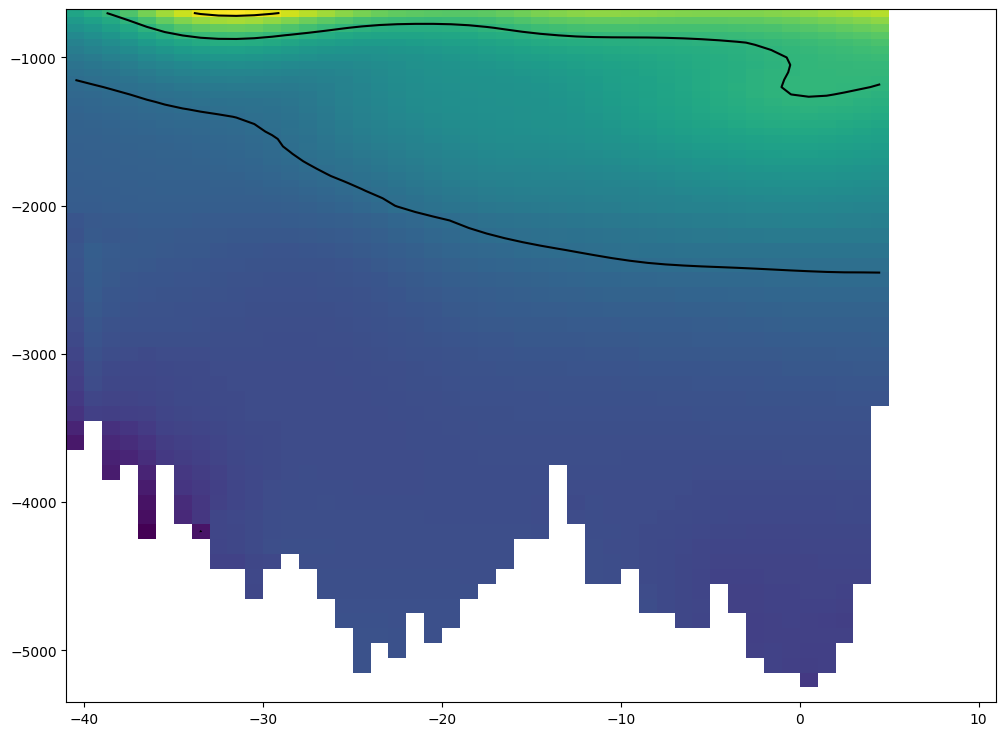

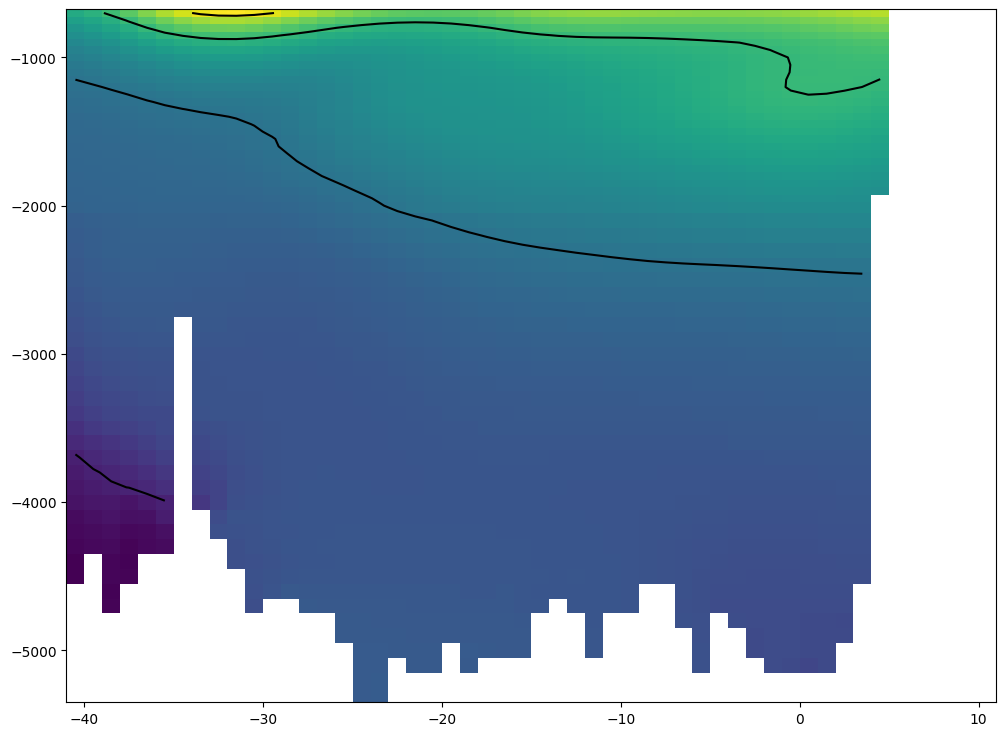

In [ ]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][40:100]
  temp = nc.variables['t_an'][0,40:100,49:101,i]
  depth=depth*-1
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,temp,4,colors='k',origin='lower') 
  plt.pcolormesh(latv,depthv,temp)
  plt.show()


# **Temperature Gradient**

**temperature gradient latitude cutoff**

In [ ]:
temp = nc.variables['t_an'][0,:,:,:]

In [ ]:
temp.shape

(102, 180, 360)

In [ ]:
  tempgradient= temp[:] 
  tempgradient.shape

(102, 180, 360)

In [ ]:
tt= temp[0:-1,:,:]
tt.shape

(101, 180, 360)

/usr/local/lib/python3.9/dist-packages/matplotlib/colors.py:718: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


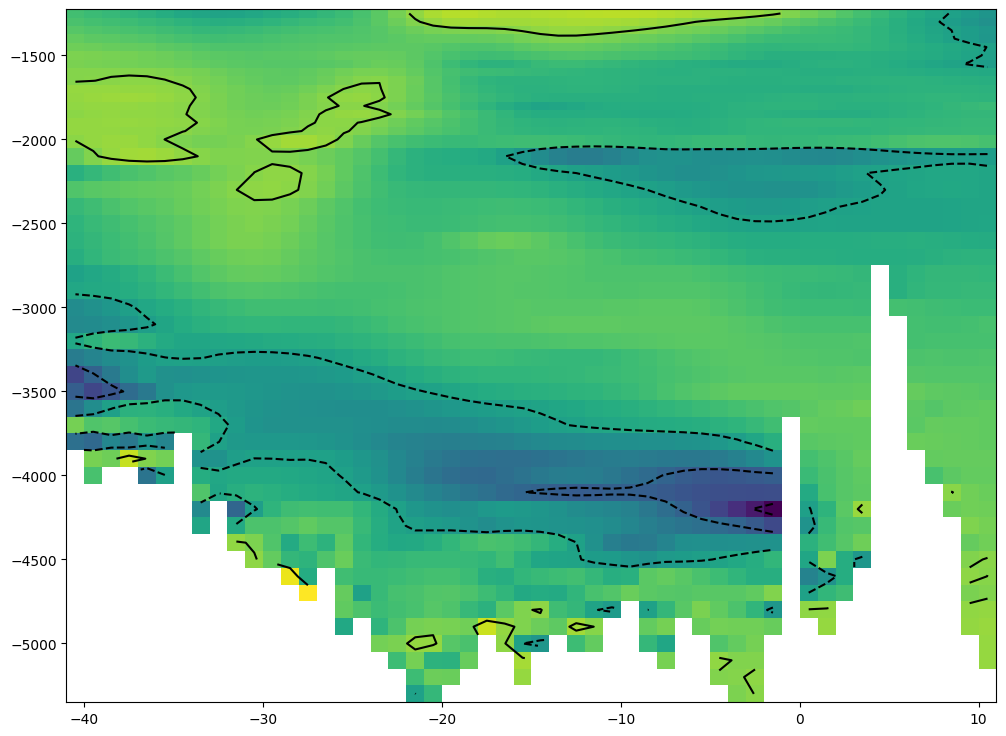

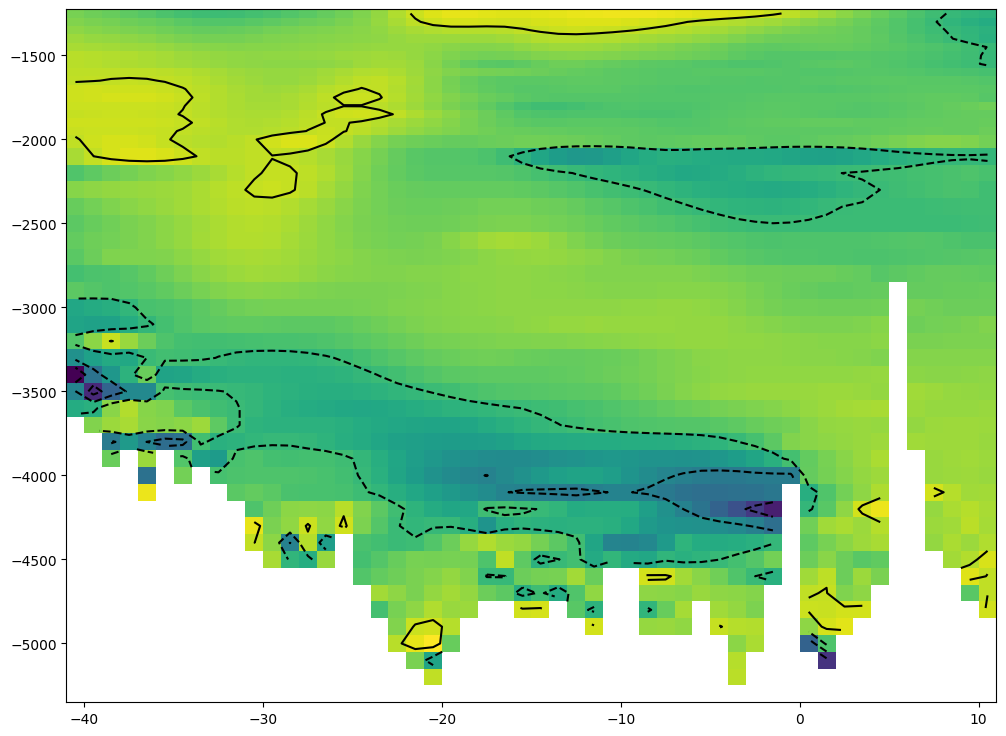

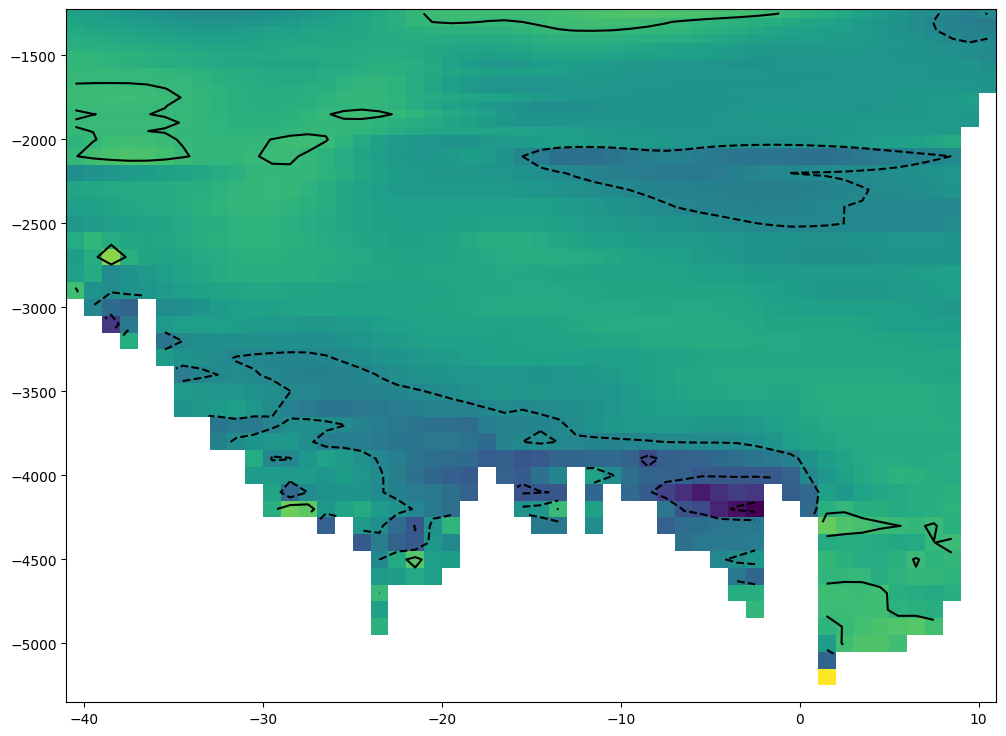

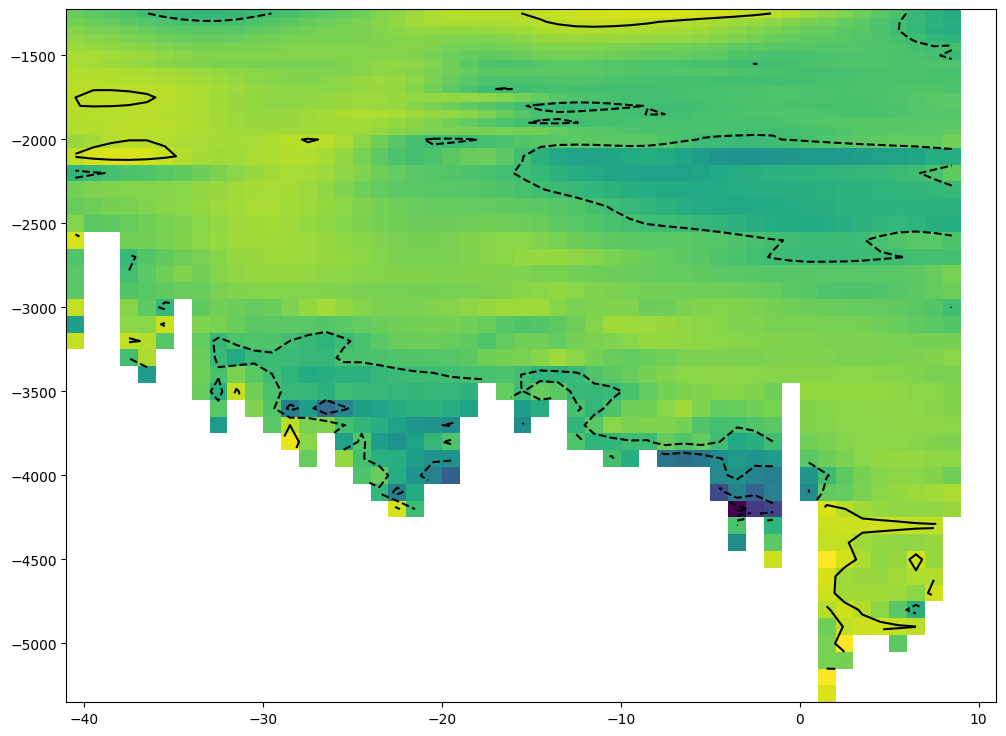

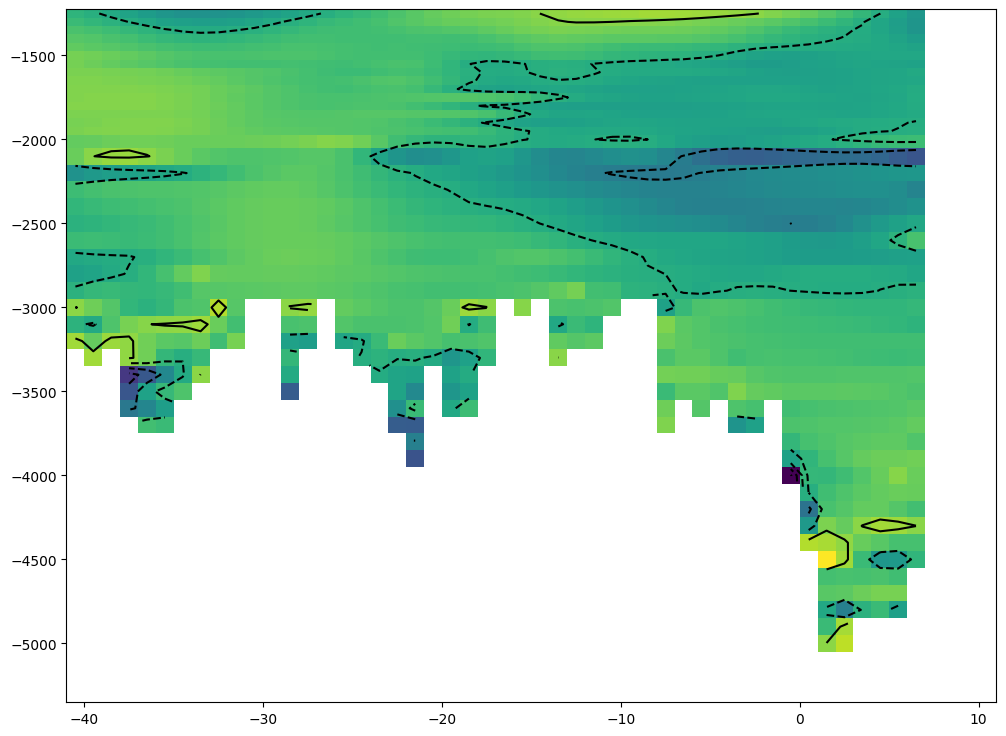

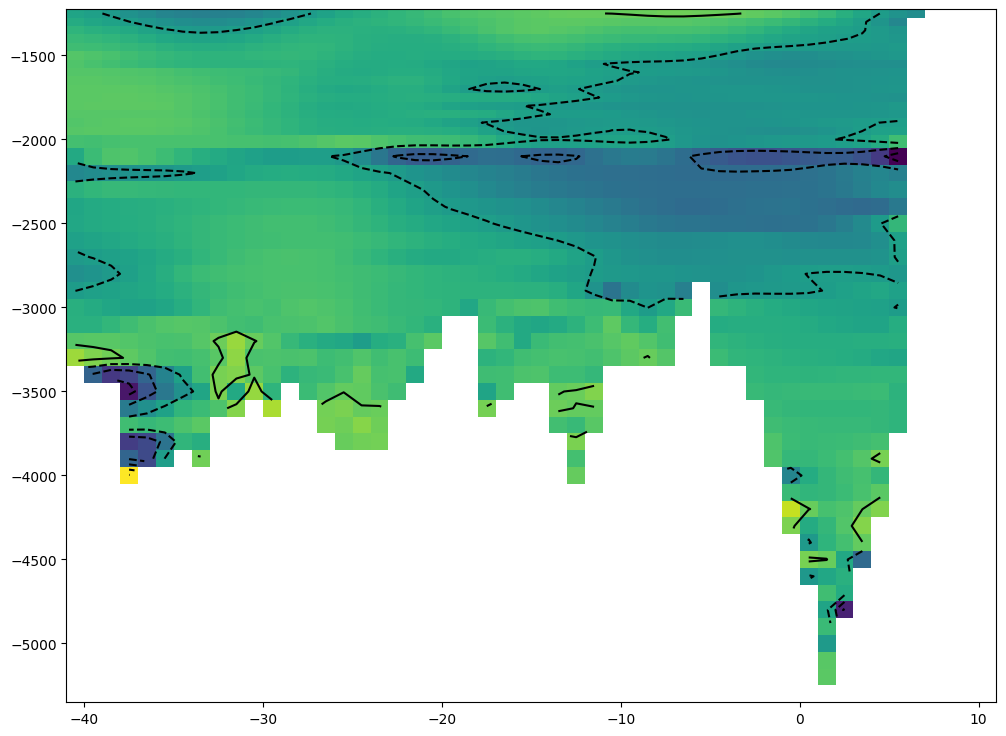

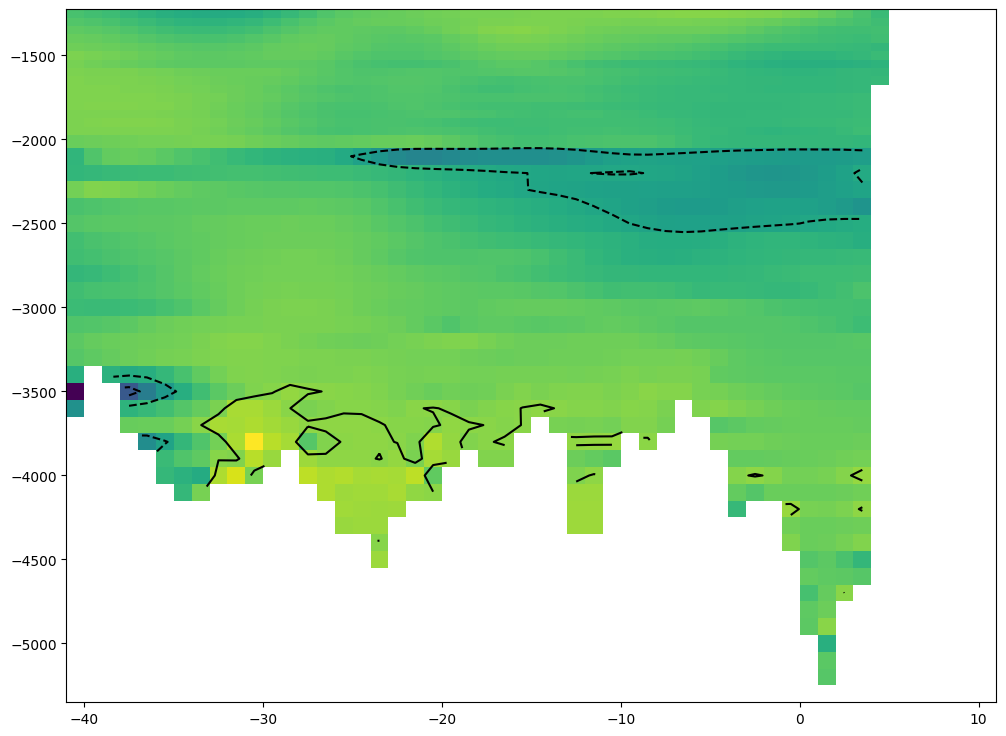

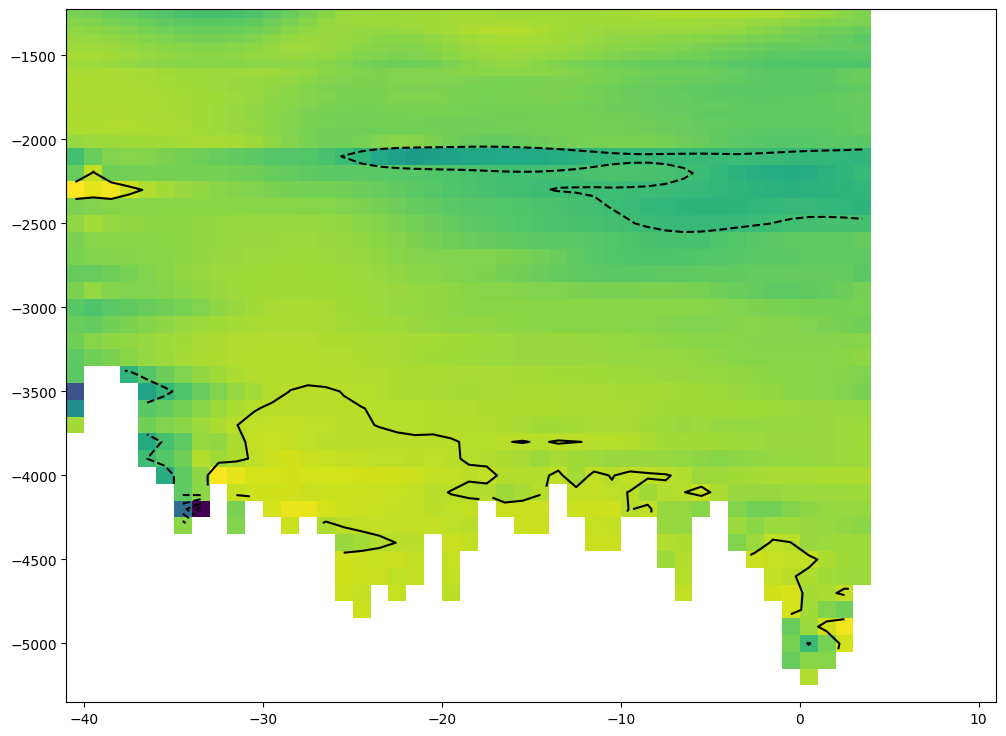

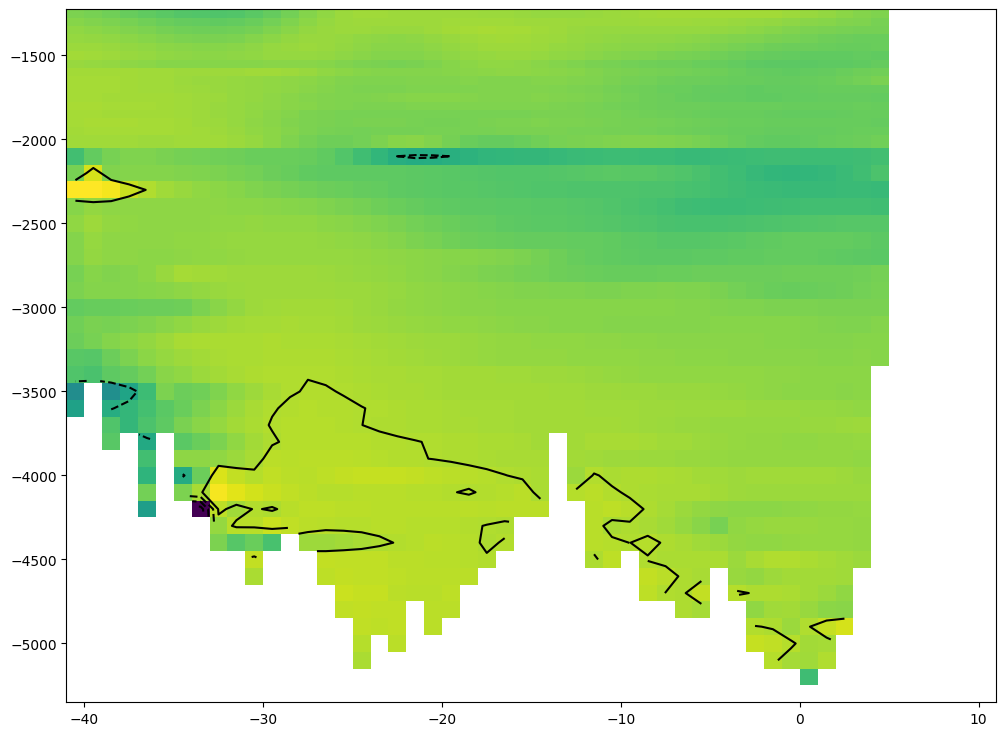

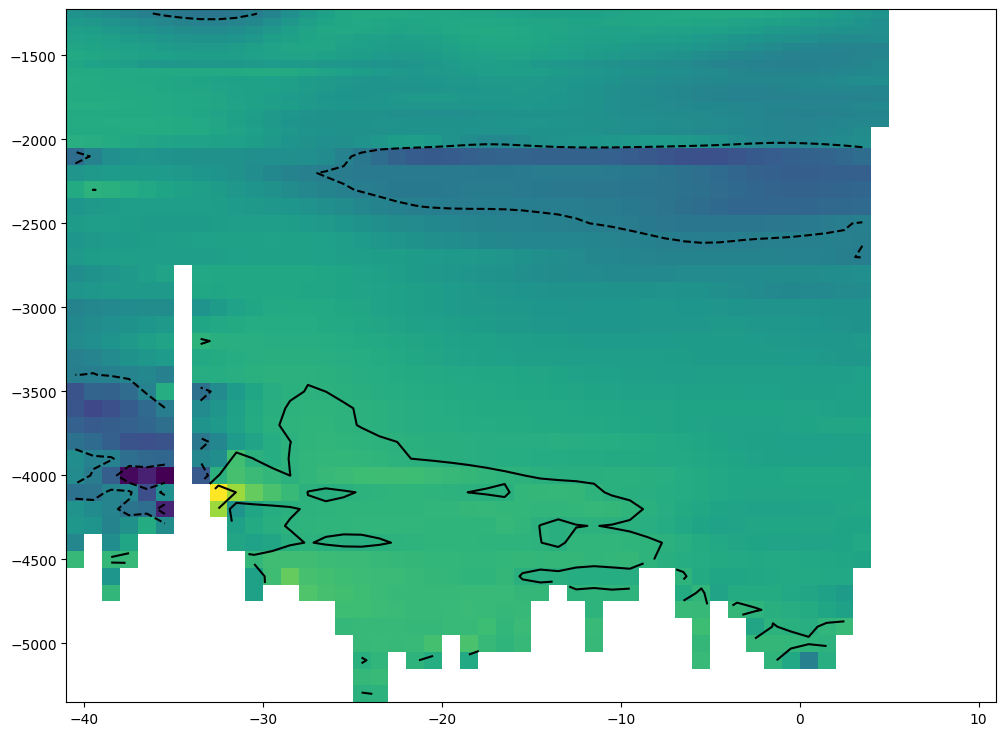

In [ ]:
for i in np.linspace(159,176,10):
  lat = nc.variables['lat'][49:101]
  lon = nc.variables['lon'][i]
  depth = nc.variables['depth'][51:100]
  depth=depth*-1
  temp = nc.variables['t_an'][0,50:100,49:101,i]
  tempgradient= temp[1:,:]-temp[0:-1,:]
  latv,depthv= np.meshgrid(lat,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(latv,depthv,tempgradient,4,colors='k',origin='lower')
  plt.pcolormesh(latv,depthv,tempgradient) 
  plt.show()

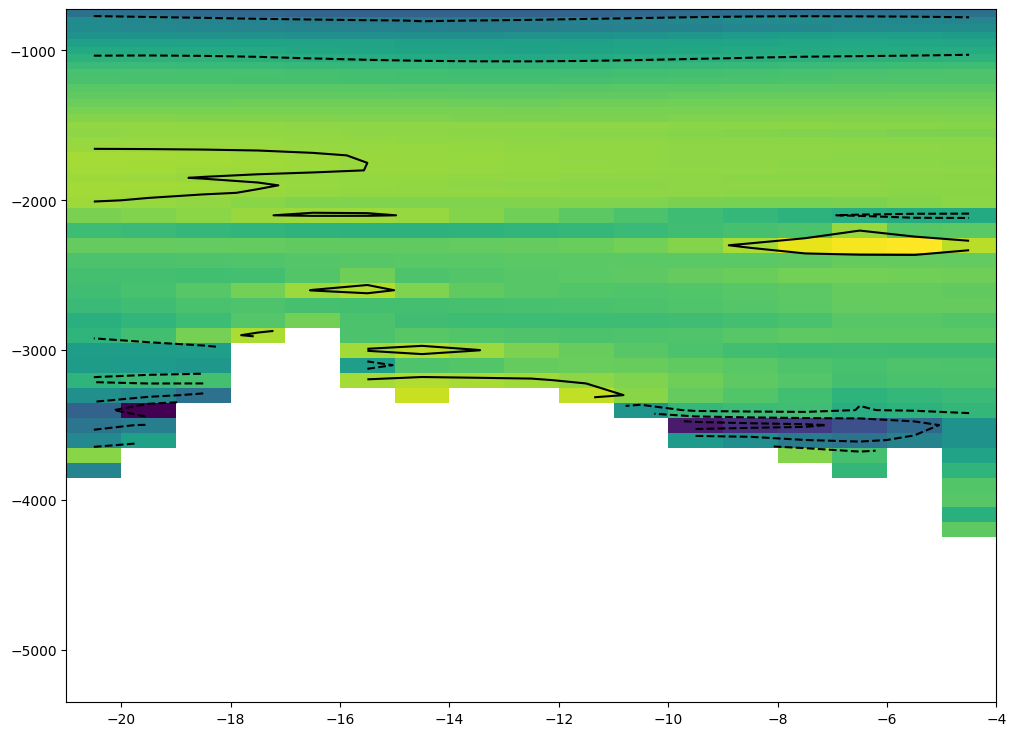

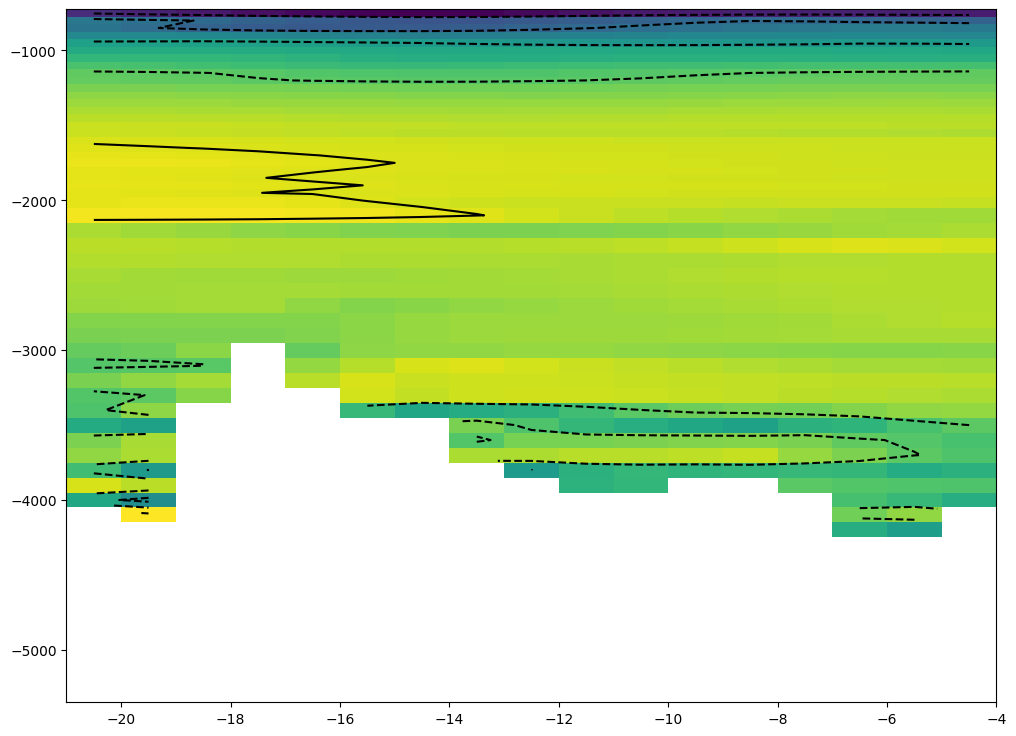

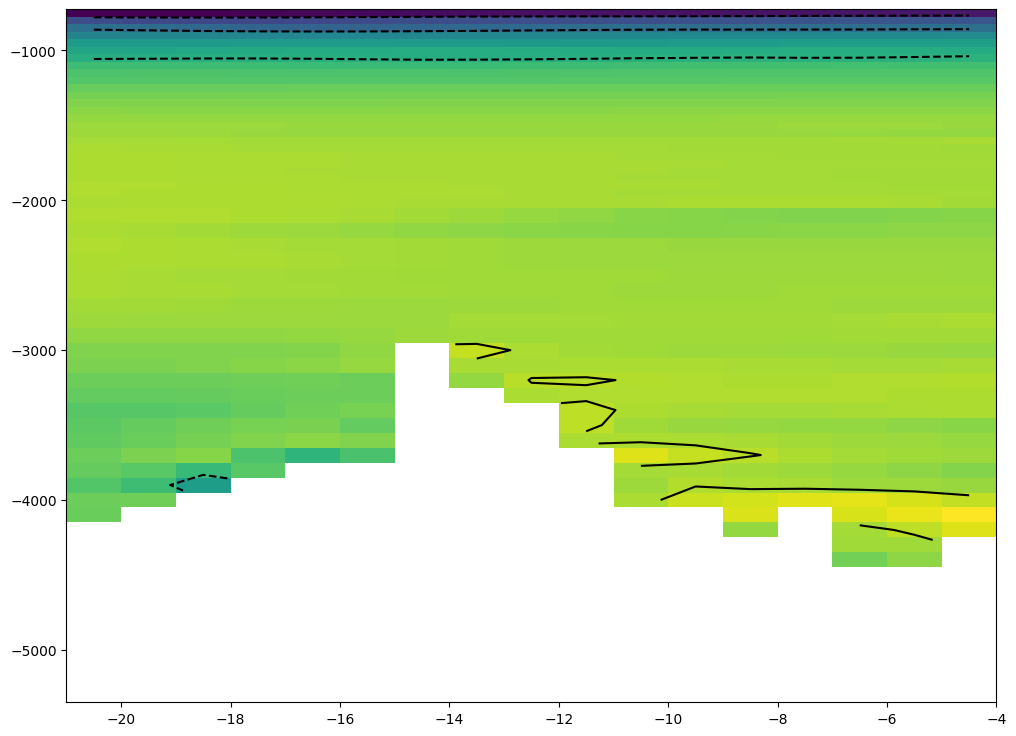

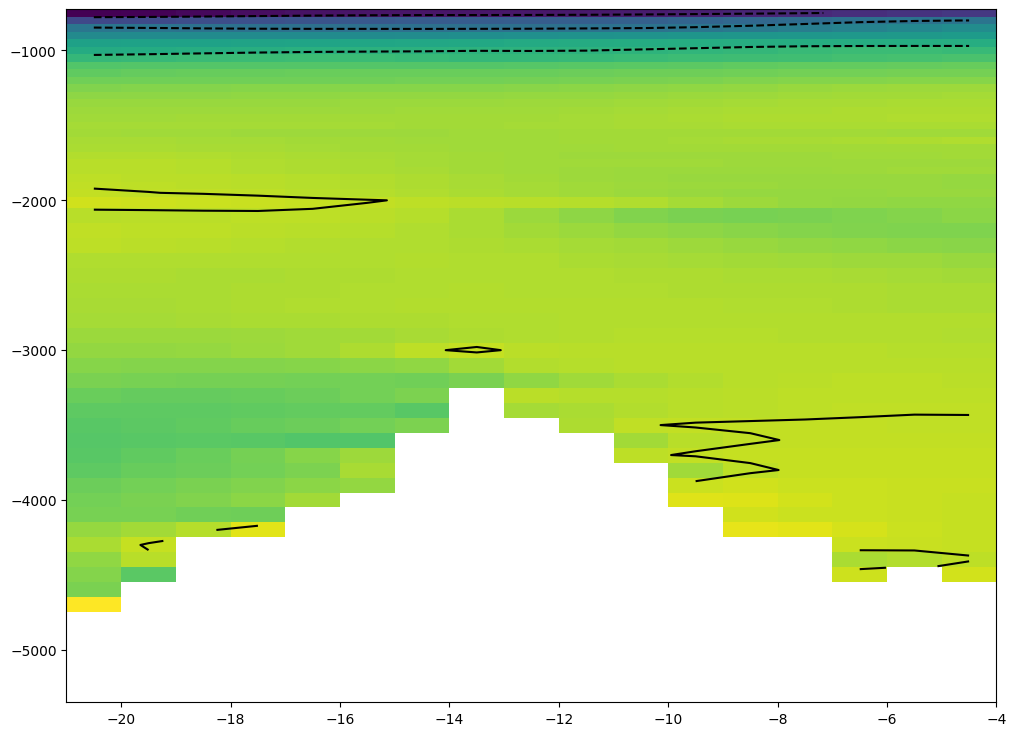

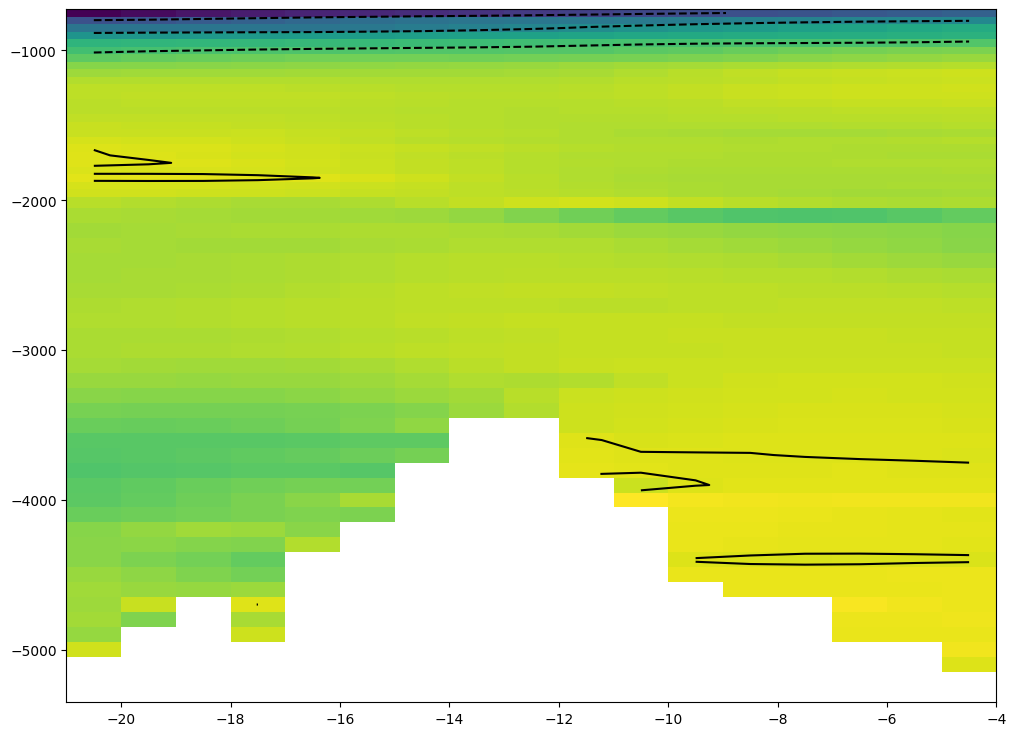

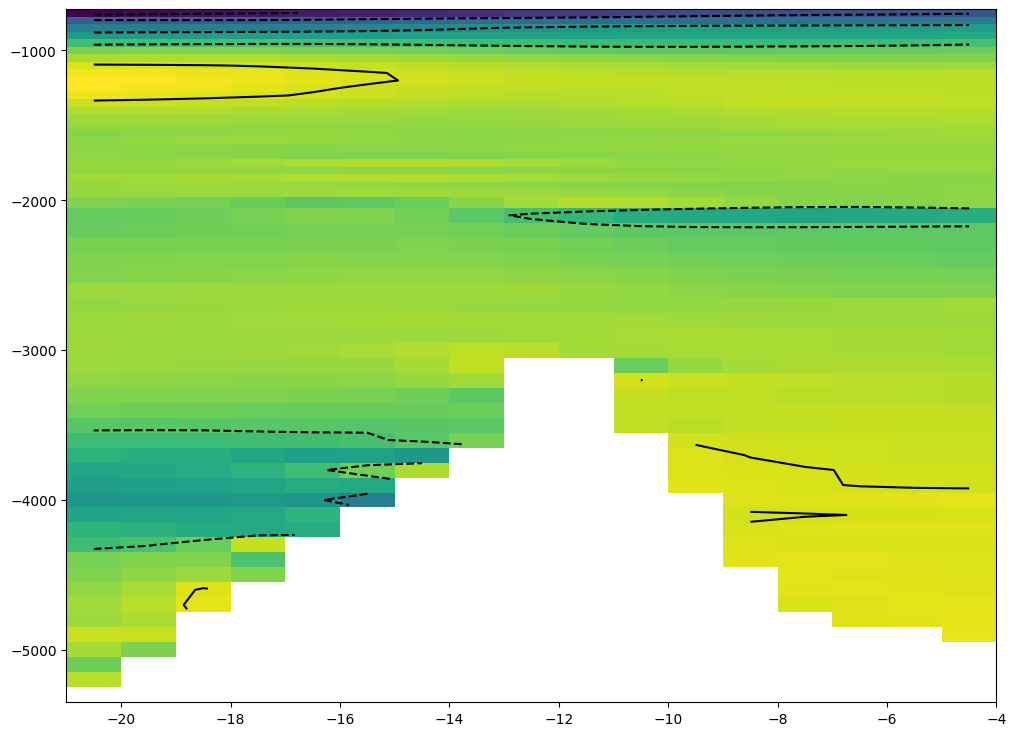

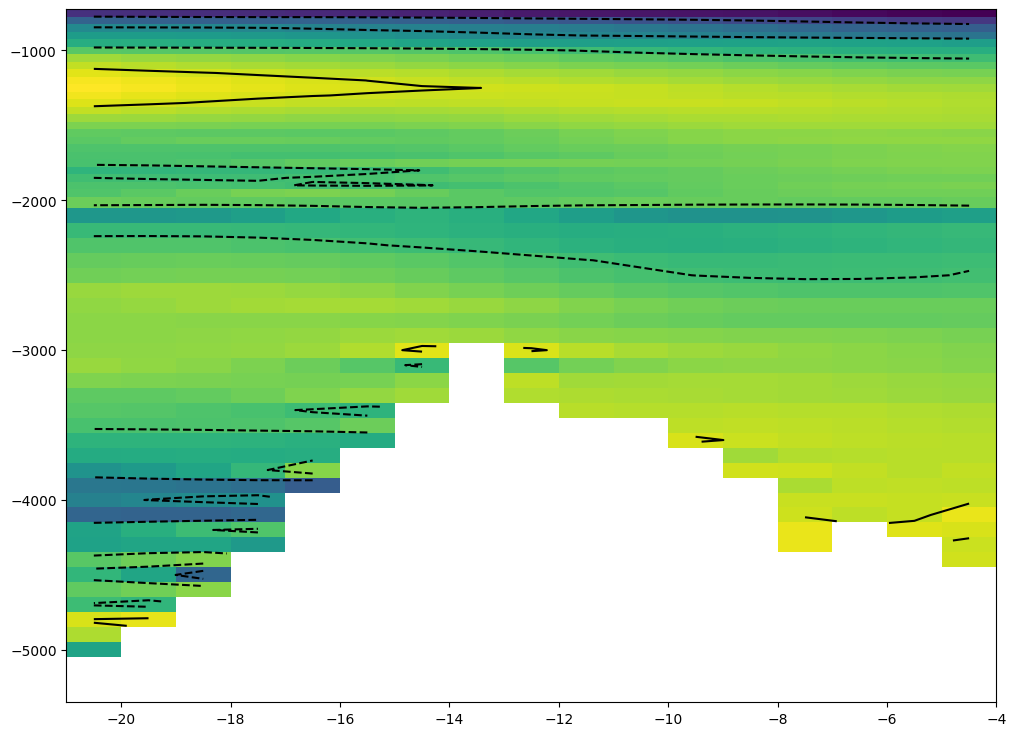

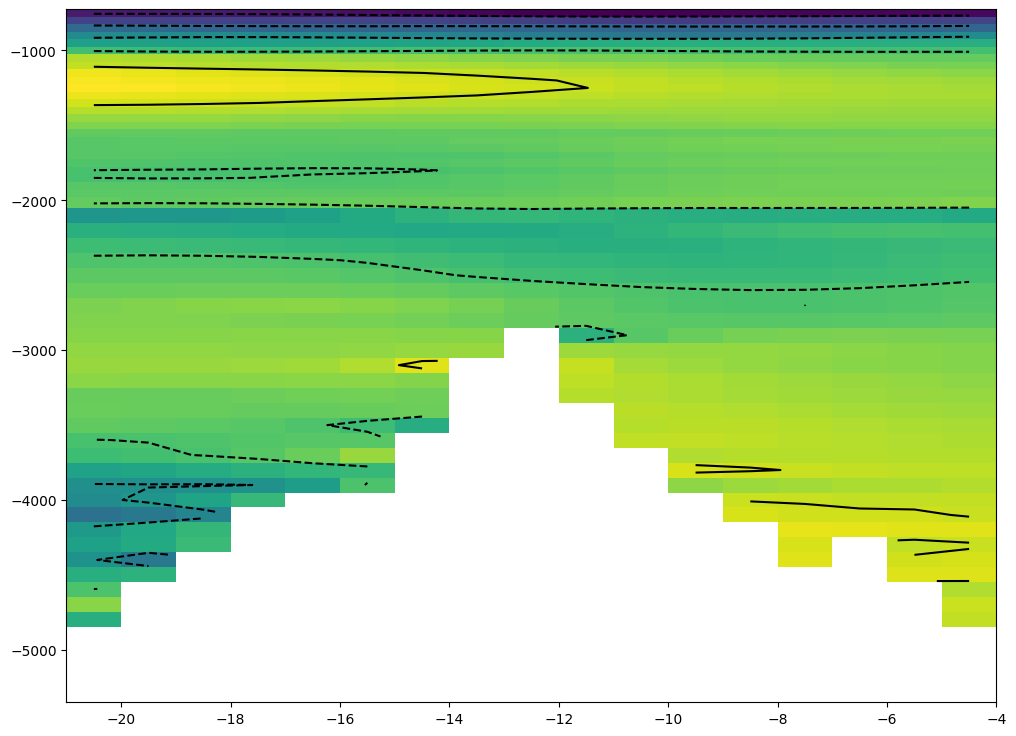

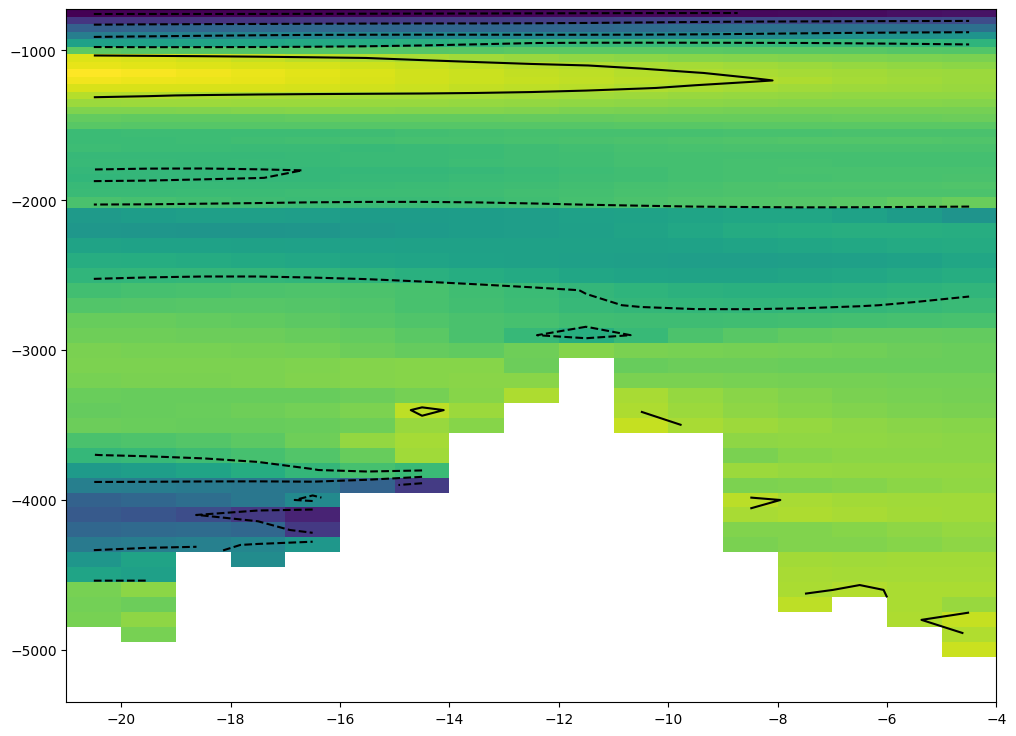

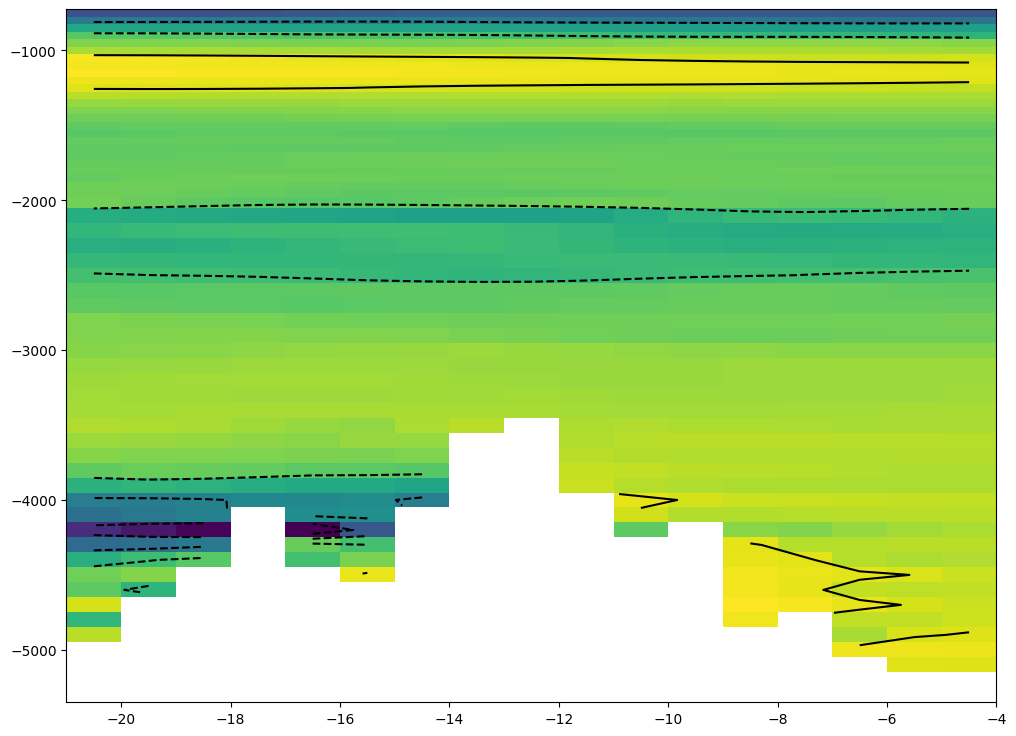

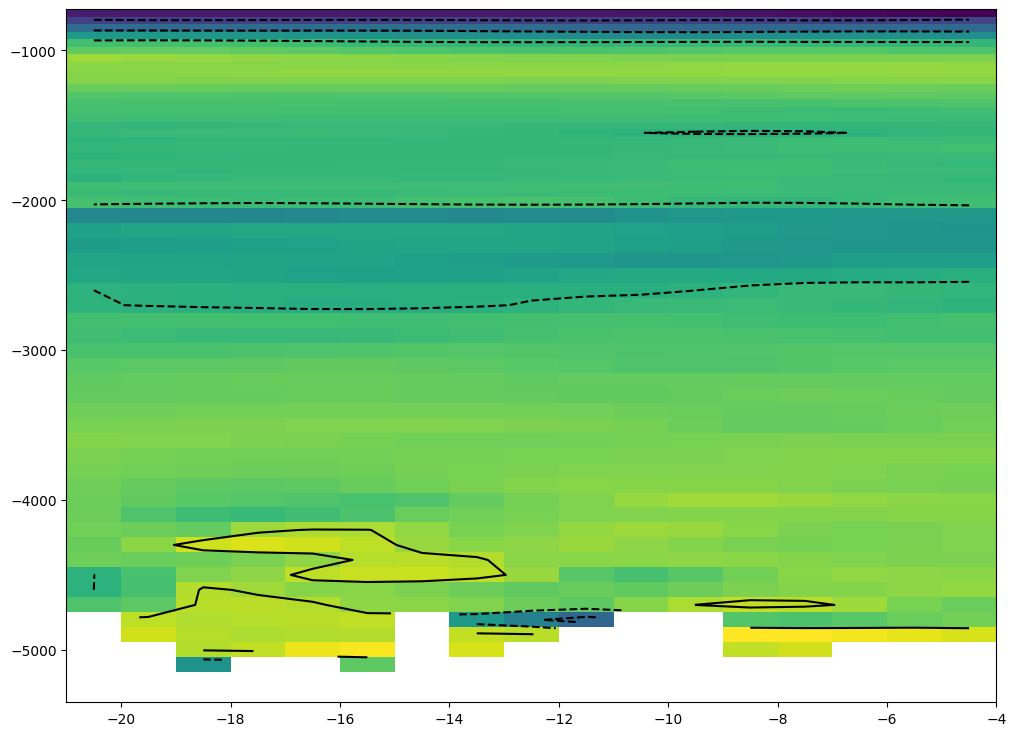

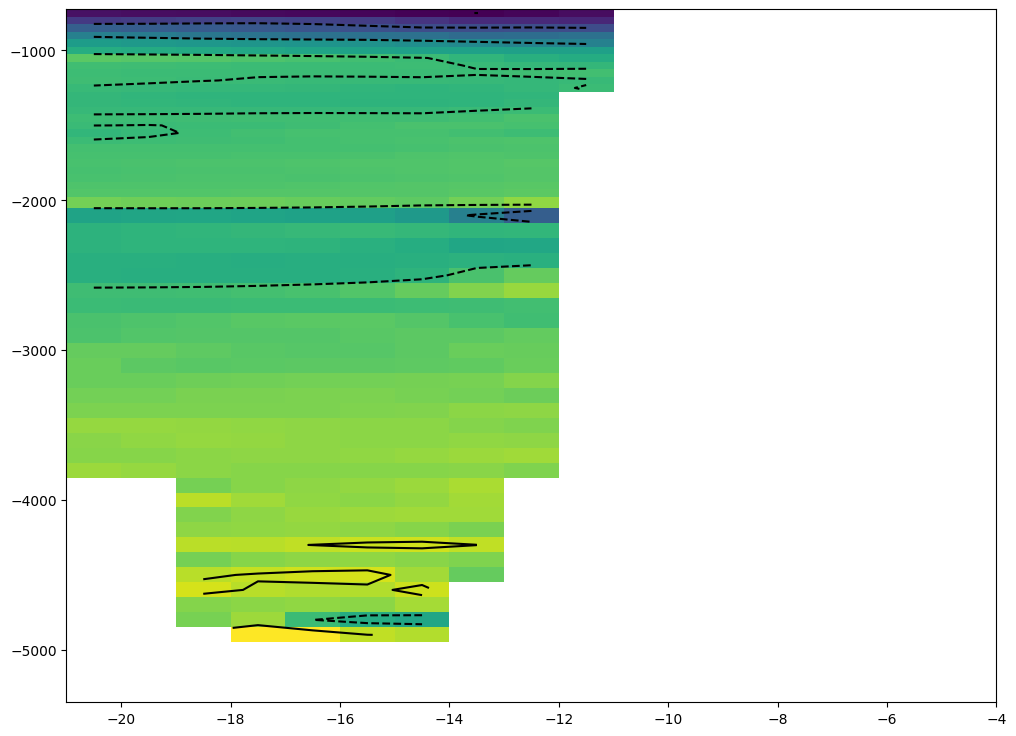

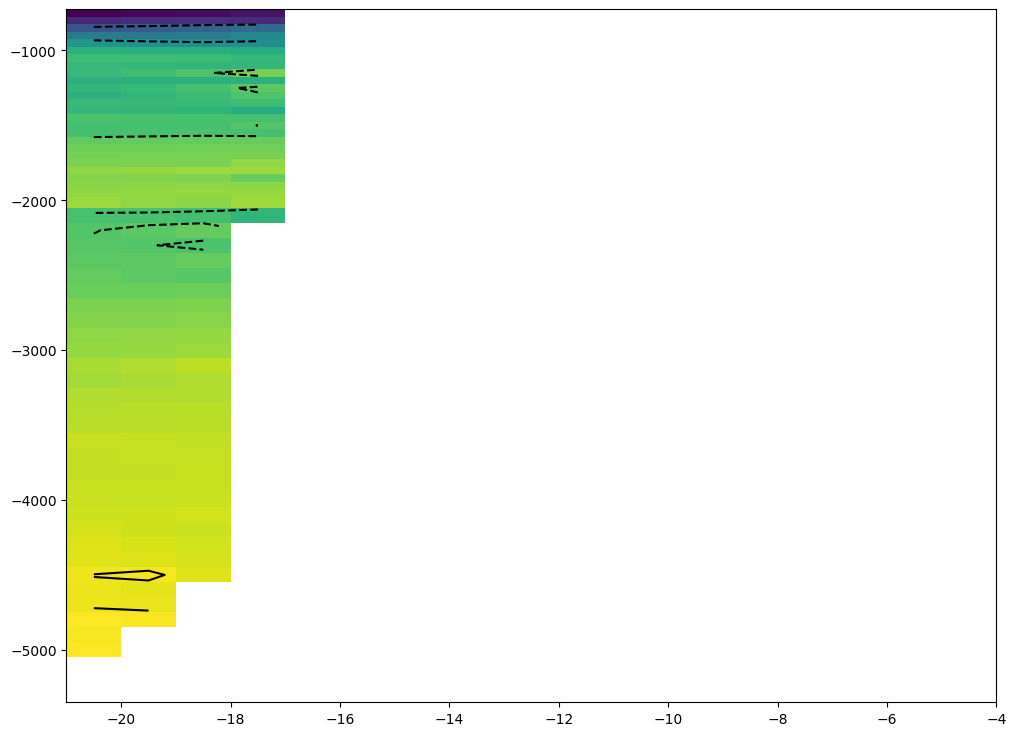

In [ ]:
for i in np.linspace(49,101,13):
  lat = nc.variables['lat'][i]
  lon = nc.variables['lon'][159:176]
  depth = nc.variables['depth'][41:100]
  depth=depth*-1
  temp = nc.variables['t_an'][0,40:100,i,159:176]
  tempgradient= temp[1:]-temp[0:-1]
  lonv,depthv= np.meshgrid(lon,depth,indexing='xy')
  fig = plt.figure(figsize=(12,9))
  cont = plt.contour(lonv,depthv,tempgradient,4,colors='k',origin='lower')
  plt.pcolormesh(lonv,depthv,tempgradient) 
  plt.show()

# **practice** **playground**

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6])
b = np.expand_dims(a, axis=1)
b


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [ ]:
row_vector = a[np.newaxis, :]
row_vector

array([[1, 2, 3, 4, 5, 6]])

In [ ]:
col_vector = a[:, np.newaxis]
col_vector

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])